# Authors
- Murat Küçük: 280201052
- Tuğberk Varoğlu: 290201092
- Umut Berke Hancıoğlu: 290201062

# Machine Learning Feature Extraction Optimization Using Evolutionary Computation Algorithms

- **Representation**: Binary Representation
- **Algorithm**: Genetic Algorithm
- **Parent Selection**: Roulette Wheel Selection
- **Survivor Selection**: Generational Replacement
- **Crossover**: Single Point Crossover
- **Mutation**: Bit Flip Mutation
- **Fitness Function**: Accuracy of the trained models
- **Population Sizes**: [10, 20, 30]
- **Mutation Rates**: [0.1, 0.15, 0.2]
- **Crossover Rates**: [0.6, 0.75, 0.9]


## Datasets
- [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) (13 features)
- [Real or Fake Jobposting Prediction Dataset](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction) (18 features)
- [Bankruptcy Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction) (96 features)


## Models
- Random Forest
- XGBoost

### Random Forest Classifier


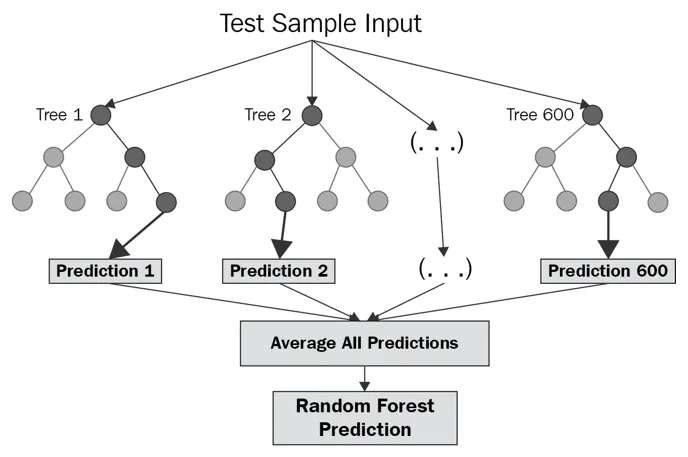

In [1]:
from IPython.display import Image
Image(filename="./images/random-forest-image.jpeg")

### XGBoost Classifier

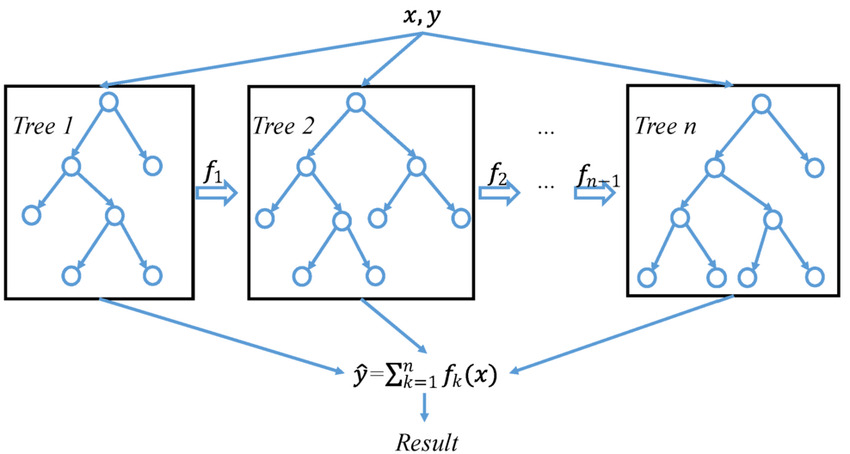

In [2]:
from IPython.display import Image
Image(filename="./images/XGBoost.jpeg")

In [3]:
# !pip install pandas numpy scikit-learn kagglehub

In [4]:
import pandas as pd
import numpy as np

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [6]:
import kagglehub

path_bankrupt = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
path_job = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")
path_heart = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")


/home/muratkucuk/Desktop/EC-Project/ec_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
heart_data_path = f"{path_heart}/heart_failure_clinical_records_dataset.csv"
job_data_path = f"{path_job}/fake_job_postings.csv"
bankrupt_data_path = f"{path_bankrupt}/data.csv"

In [8]:
heart_data = pd.read_csv(heart_data_path)
job_data = pd.read_csv(job_data_path)
bankrupt_data = pd.read_csv(bankrupt_data_path)

# Check Datasets
- There are no null values ​​in any dataset.

In [9]:
display(len(heart_data.columns))

13

In [10]:
# Check data types and missing values for each dataset
display(heart_data.info())
display(job_data.info())
display(bankrupt_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

None

In [11]:
print("Heart Failure Dataset Columns:")
print(heart_data.columns.tolist())
print("\nFake Job Posting Dataset Columns:")
print(job_data.columns.tolist())
print("\nBankruptcy Prediction Dataset Columns:")
print(bankrupt_data.columns.tolist())

Heart Failure Dataset Columns:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Fake Job Posting Dataset Columns:
['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']

Bankruptcy Prediction Dataset Columns:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Ex

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def fitness(chromosome, model, X, y):
    # Select features based on the chromosome
    selected_features = np.where(chromosome == 1)[0]

    if len(selected_features) == 0:
        # Return a very low fitness score if no features are selected
        return 0.0

    # Subset the dataset using selected features
    X_selected = X[:, selected_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    try:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate and return accuracy
        fitness = accuracy_score(y_test, y_pred)
        return fitness
    except Exception as e:
        print(f"Error during model training or prediction: {e}")
        return 0.0


## Parent Selection Types

In [13]:
def rank_based_selection(fitness_values, num_parents):
    sorted_indices = np.argsort(fitness_values)
    ranks = np.arange(1, len(fitness_values) + 1)
    total_rank = np.sum(ranks)
    probabilities = ranks / total_rank
    selected_parents = np.random.choice(sorted_indices, size=num_parents, p=probabilities)
    return selected_parents

In [14]:
def tournament_selection(fitness_values, num_parents=2, tournament_size=3):
    """
    Perform tournament selection to choose parents for crossover.

    Args:
        fitness_values (numpy.ndarray): Array of fitness values for the population.
        num_parents (int): Number of parents to select.
        tournament_size (int): Number of individuals to compete in each tournament.

    Returns:
        numpy.ndarray: Indices of the selected parents.
    """
    selected_parents = []  # Initialize an empty list to store the indices of selected parents

    for _ in range(num_parents):
        # Randomly select 'tournament_size' individuals from the population
        tournament_indices = np.random.choice(len(fitness_values), size=tournament_size, replace=False)
        
        # Get the fitness values of the selected individuals
        tournament_fitness = fitness_values[tournament_indices]
        
        # Find the index of the individual with the highest fitness in the tournament
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        
        # Add the index of the winner to the list of selected parents
        selected_parents.append(winner_index)
    
    return np.array(selected_parents)  # Convert the list to a numpy array and return it

In [15]:
def roulette_wheel_selection(fitness_values, num_parents):
    total_fitness = np.sum(fitness_values)
    probabilities = fitness_values / total_fitness
    selected_parents = np.random.choice(len(fitness_values), size=num_parents, p=probabilities)
    return selected_parents

In [16]:
def select_best_individuals(old_population, new_population, old_fitness_values, new_fitness_values, num_individuals):
    """
    Selects the best individuals from the combined old and new populations based on provided fitness values 
    and number of ones. Returns the best individuals and their corresponding fitness values.

    Parameters:
        old_population (numpy.ndarray): The old population array.
        new_population (numpy.ndarray): The new population array.
        old_fitness_values (numpy.ndarray): Fitness values of the old population.
        new_fitness_values (numpy.ndarray): Fitness values of the new population.
        num_individuals (int): The number of individuals to select for the new population.

    Returns:
        tuple: A tuple containing:
            - numpy.ndarray: The best individuals array.
            - numpy.ndarray: The fitness values of the best individuals.
    """
    # Combine old and new populations
    combined_population = np.vstack((old_population, new_population))
    
    # Combine old and new fitness values
    combined_fitness_values = np.concatenate((old_fitness_values, new_fitness_values))
    
    # Calculate the number of ones for each individual
    num_ones = np.sum(combined_population, axis=1)
    
    # Create a structured array for sorting
    structured_array = np.array(
        list(zip(combined_fitness_values, num_ones, combined_population)),
        dtype=[('fitness', float), ('num_ones', int), ('individual', object)]
    )
    
    # Sort by fitness (descending) and then by number of ones (ascending)
    sorted_indices = np.lexsort((structured_array['num_ones'], -structured_array['fitness']))
    sorted_array = structured_array[sorted_indices]
    
    # Select the best individuals and their fitness values
    best_individuals = np.array([ind['individual'] for ind in sorted_array[:num_individuals]])
    best_fitness_values = np.array([ind['fitness'] for ind in sorted_array[:num_individuals]])
    
    return best_individuals, best_fitness_values


## Crossover and Mutation Functions

In [17]:
def crossover(population, parents, crossover_rate, dimensions): #single-point crossover
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, dimensions)
        child1 = np.concatenate((population[parents[0], :point], population[parents[1], point:]))
        child2 = np.concatenate((population[parents[1], :point], population[parents[0], point:]))
        return child1, child2
    else:
        return population[parents[0]], population[parents[1]]

In [18]:
def bitFlip_mutation(chromosome, mutation_rate): #bit flip mutation
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

## Evolutionary Computation Algorithms

In [19]:
def genetic_algorithm(dataset, model, dimension, population_size, generations, mutation_rate, crossover_rate):
    pop = np.random.randint(0, 2, size=(population_size, dimension))
    X = dataset.iloc[:, :-1].values  # All columns except the last one
    y = dataset.iloc[:, -1].values
    fitness_values = [fitness(chromosome, model, X, y) for chromosome in pop]
    
    # Finding the Best
    max_fitness = np.max(fitness_values)  # Find the maximum fitness value
    best_chromosomes = [chromosome for chromosome, fitness in zip(pop, fitness_values) if fitness == max_fitness]  # Get all chromosomes with max fitness

    # If multiple chromosomes have the same max fitness, choose the one with the fewest 1s
    if len(best_chromosomes) > 1:
        best_chromosome = min(best_chromosomes, key=lambda chromosome: np.sum(chromosome))  # Select chromosome with fewest 1s
    else:
        best_chromosome = best_chromosomes[0]  # If only one, select it directly

    best_fitness = max_fitness  # Assign the max fitness value

    fitness_stats = {
        "mean": [],
        "std": [],
        "best": [],
        "worst": []
    }

    print(f"generation:{0}, best fitness: {best_fitness}, best chromosome: {best_chromosome}")
    for gen in range(1, generations):
        pop_new = np.zeros((len(pop), dimension), dtype=int)
        for i in range(len(pop) // 2):
            parents = roulette_wheel_selection(fitness_values, len(pop))
            child1, child2 = crossover(pop, parents, crossover_rate, dimension)
            pop_new[i*2] = bitFlip_mutation(child1, mutation_rate)
            pop_new[i*2 + 1] = bitFlip_mutation(child2, mutation_rate)
        fitness_values_new = [fitness(chromosome, model, X, y) for chromosome in pop_new]
        pop, fitness_values = select_best_individuals(pop, pop_new, fitness_values, fitness_values_new, population_size)

        best_chromosome = pop[0]
        best_fitness = fitness_values[0]

        if gen == generations - 1:
            mean_fitness = np.mean(fitness_values)
            std_fitness = np.std(fitness_values)
            best_fitness_gen = np.max(fitness_values)
            worst_fitness_gen = np.min(fitness_values)

            fitness_stats["mean"].append(mean_fitness)
            fitness_stats["std"].append(std_fitness)
            fitness_stats["best"].append(best_fitness_gen)
            fitness_stats["worst"].append(worst_fitness_gen)

        print(f"generation:{gen}, best fitness: {best_fitness}, best chromosome: {best_chromosome}")
    
    # Get the best and worst chromosomes and their fitness values in the last generation
    worst_chromosome = pop[np.argmin(fitness_values)]
    worst_fitness = np.min(fitness_values)

    return best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness


In [20]:
def differential_evolution(dataset, model, dimension, population_size, generations, F, crossover_rate):
    """
    Args:
        X: Feature matrix.
        y: Target vector.
        model: Machine learning model to evaluate fitness.
        dimension: Number of features (dimensions).
        population_size: Number of individuals in the population.
        generations: Number of generations.
        F: Differential weight. [0, 2]
        crossover_rate: Crossover probability.
    Returns:
        best_solution: Best chromosome found.
        best_fitness: Fitness of the best chromosome.
    """
    # Initialize population with binary representation
    population = np.random.randint(0, 2, size=(population_size, dimension))

    X = dataset.iloc[:, :-1].values  # All columns except the last one
    y = dataset.iloc[:, -1].values

    fitness_values = np.array([fitness(ind, model, X, y) for ind in population])
    best_idx = np.argmax(fitness_values)
    best_solution = population[best_idx]
    best_fitness = fitness_values[best_idx]

    for gen in range(generations):
        for i in range(population_size):
            # Select three random indices r1, r2, r3 (distinct from each other and i)
            indices = list(range(population_size))
            indices.remove(i)
            r1, r2, r3 = np.random.choice(indices, 3, replace=False)

            # Mutation: Generate mutant vector
            mutant = np.copy(population[r1])
            for d in range(dimension):
                if np.random.rand() < F:
                    mutant[d] = population[r2][d] ^ population[r3][d]  # XOR mutation

            # Crossover: Create trial vector
            trial = np.copy(population[i])
            for d in range(dimension):
                if np.random.rand() < crossover_rate:
                    trial[d] = mutant[d]

            # Calculate fitness of trial vector
            trial_fitness = fitness(trial, model, X, y)

            # Selection: Replace if trial vector is better
            if trial_fitness > fitness_values[i]:
                population[i] = trial
                fitness_values[i] = trial_fitness

                # Update global best
                if trial_fitness > best_fitness:
                    best_solution = trial
                    best_fitness = trial_fitness

        print(f"Generation {gen + 1}: Best Fitness = {best_fitness}: Best Solution = {best_solution}")

    return best_solution, best_fitness

In [21]:
def evolution_strategy(dataset, model, dimension, population_size, generations, mutation_rate):
    """
    Evolution Strategy algorithm for feature selection.

    Args:
        dataset: Pandas DataFrame containing the dataset.
        model: Machine learning model to evaluate fitness.
        dimension: Number of features.
        population_size: Population size.
        generations: Number of generations.
        mutation_rate: Mutation rate.

    Returns:
        tuple: Best chromosome and its fitness.
    """

    # Initialize population with binary representation
    population = np.random.randint(0, 2, size=(population_size, dimension))
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    # Evaluate initial population fitness
    fitness_values = np.array([fitness(ind, model, X, y) for ind in population])

    best_idx = np.argmax(fitness_values)
    best_solution = population[best_idx]
    best_fitness = fitness_values[best_idx]

    for generation in range(generations):
        for i in range(population_size):
            # Create offspring by mutating the parent using bitFlip_mutation
            offspring = bitFlip_mutation(np.copy(population[i]), mutation_rate) 

            # Evaluate fitness of offspring
            offspring_fitness = fitness(offspring, model, X, y)

            # Select the best between parent and offspring
            if offspring_fitness > fitness_values[i]:
                population[i] = offspring
                fitness_values[i] = offspring_fitness
                if offspring_fitness > best_fitness:
                    best_solution = offspring
                    best_fitness = offspring_fitness
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}: Best Solution = {best_solution}")

    return best_solution, best_fitness

## Run the Program

In [22]:
#Algorithms : GA, DE, ES
#Datasets: heart_data(13 dimension), job_data(18 dimension), footballer_data(26 dimension)
#          loan_data(35 dimension), bankrupt_data(96 dimension)
def evolution(algorithm, dataset, model, pop_size, gens = 10, mut_rate = 0.01, cross_rate = 0.9, F=0.8):

    dimension = len(dataset.columns) - 1  # The label for the row (last column is not a feature!)
    population_size = pop_size
    generations = gens
    mutation_rate = mut_rate
    crossover_rate = cross_rate
    F = F

    if algorithm == "GA":
        best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = genetic_algorithm(dataset, model, dimension, population_size, generations, mutation_rate, crossover_rate)
        return best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness
    # These are optional, currently not working!
    #elif algorithm == "DE":
        #print("Running Differential Evolution...")
        # def differential_evolution(dataset, model, dimension, population_size, generations, F, crossover_rate):
        #differential_evolution(dataset=dataset, model=model, dimension=dimension, population_size=population_size, generations=generations, F=F, crossover_rate=crossover_rate)
    #elif algorithm == "ES":
        #print("Running Evolution Strategy...")
        #evolution_strategy(dataset, model, dimension, population_size, generations, mutation_rate)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameters
algorithm = "GA"
dataset = heart_data
model = RandomForestClassifier()
pop_size = 100
gens = 10
mut_rate = 0.1
cross_rate = 0.75

# Run the genetic algorithm
best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = genetic_algorithm(
    dataset=dataset,
    model=model,
    dimension=len(dataset.columns) - 1,
    population_size=pop_size,
    generations=gens,
    mutation_rate=mut_rate,
    crossover_rate=cross_rate
)

# Print the results
print("Best Chromosome:", best_chromosome)
print("Best Fitness:", best_fitness)
print("Mean Fitness:", mean_fitness)
print("Standard Deviation of Fitness:", std_fitness)
print("Worst Chromosome:", worst_chromosome)
print("Worst Fitness:", worst_fitness)

generation:0, best fitness: 0.8, best chromosome: [0 0 0 1 1 1 1 0 1 0 0 1]
generation:1, best fitness: 0.8166666666666667, best chromosome: [0 0 0 1 1 1 1 0 1 0 0 1]
generation:2, best fitness: 0.8166666666666667, best chromosome: [0 0 0 1 1 1 1 0 1 0 1 1]
generation:3, best fitness: 0.8166666666666667, best chromosome: [0 0 0 1 1 1 1 0 1 0 1 1]
generation:4, best fitness: 0.8166666666666667, best chromosome: [0 0 0 1 1 1 1 0 1 0 1 1]
generation:5, best fitness: 0.8166666666666667, best chromosome: [0 0 0 1 1 1 1 0 1 0 1 1]
generation:6, best fitness: 0.8166666666666667, best chromosome: [1 0 0 0 1 1 1 0 1 0 0 1]
generation:7, best fitness: 0.8166666666666667, best chromosome: [1 0 0 0 1 1 1 0 1 0 0 1]
generation:8, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 1 0 0 1 0 1 1]
generation:9, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 1 1 0 0 0 0 1]
Best Chromosome: [0 0 0 0 1 1 1 0 0 0 0 1]
Best Fitness: 0.8166666666666667
Mean Fitness: 0.7973333333333

In [24]:
from sklearn.ensemble import RandomForestClassifier

gen_alg = "GA"

pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]
stats = []
count = 1

# Example usage for different mutation rates, crossover rates, and population sizes
print(f"Running Genetic Algorithm on heart data.\nModel=RandomForestClassifier()")
for pop_size in pop_sizes:
    for mut_rate in mut_rates:
        for cross_rate in cross_rates:
            print(f"Run: {count}")
            print(f"Population Size: {pop_size}, Mutation Rate: {mut_rate}, Crossover Rate: {cross_rate}")
            best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = evolution(
                algorithm=gen_alg,
                dataset=heart_data,
                model=RandomForestClassifier(),
                pop_size=pop_size,
                gens=10,
                mut_rate=mut_rate,
                cross_rate=cross_rate
            )
            #print(f"best_fitness: {best_fitness} best_chromosome: {best_chromosome}")
            stats.append((pop_size, mut_rate, cross_rate, best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness))
            count += 1
            # Convert stats to a DataFrame
stats_df = pd.DataFrame(stats, columns=["Population Size", "Mutation Rate", "Crossover Rate", "Best Chromosome", "Best Fitness", "Mean Fitness", "Std Fitness", "Worst Chromosome", "Worst Fitness"])

# Display the DataFrame
display(stats_df)

Running Genetic Algorithm on heart data.
Model=RandomForestClassifier()
Run: 1
Population Size: 10, Mutation Rate: 0.1, Crossover Rate: 0.6
generation:0, best fitness: 0.75, best chromosome: [0 0 1 0 0 1 0 1 1 1 1 1]
generation:1, best fitness: 0.75, best chromosome: [0 0 1 0 0 1 0 1 1 1 1 1]
generation:2, best fitness: 0.7666666666666667, best chromosome: [1 0 0 0 1 1 0 1 0 0 0 1]
generation:3, best fitness: 0.7666666666666667, best chromosome: [1 0 0 0 1 1 0 0 0 1 0 1]
generation:4, best fitness: 0.7666666666666667, best chromosome: [1 0 0 0 1 1 0 1 0 1 0 1]
generation:5, best fitness: 0.7833333333333333, best chromosome: [0 0 0 1 1 0 1 1 0 1 0 1]
generation:6, best fitness: 0.7833333333333333, best chromosome: [0 0 0 0 0 0 1 1 0 1 0 1]
generation:7, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 1 0 1 1 1 0 1]
generation:8, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 0 0 1 1 1 0 0]
generation:9, best fitness: 0.8166666666666667, best chromosome: [0 0

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,"[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]",0.816667,0.781667,0.017401,"[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]",0.766667
1,10,0.10,0.75,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]",0.816667,0.781667,0.013844,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]",0.766667
2,10,0.10,0.90,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]",0.816667,0.800000,0.010541,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]",0.783333
3,10,0.15,0.60,"[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]",0.816667,0.793333,0.013333,"[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]",0.783333
4,10,0.15,0.75,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]",0.816667,0.795000,0.010672,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]",0.783333
5,10,0.15,0.90,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]",0.816667,0.805000,0.007638,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1]",0.800000
6,10,0.20,0.60,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]",0.800000,0.785000,0.013844,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]",0.766667
7,10,0.20,0.75,"[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]",0.816667,0.788333,0.013017,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]",0.766667
8,10,0.20,0.90,"[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]",0.783333,0.783333,0.000000,"[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]",0.783333
9,20,0.10,0.60,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]",0.816667,0.793333,0.011055,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]",0.783333


In [25]:
stats_df.to_csv("./datas/random-forest-heart-dataset", index=False)

In [26]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:02


In [ ]:
'''
This is for generalization for the 3 datasets and 2 models. But we have run the code in three separate agents to avoid the long run time.
For this reason, there may occur some errors during running the code in one agent since we have rearrange the code for dataset speacilization.
'''

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

gen_alg = "GA"

datasets = [heart_data, job_data, bankrupt_data]
datasets_names = ["heart_data", "job_data", "bankrupt_data"]
models = [RandomForestClassifier(), xgb.XGBClassifier()]


pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]
stats = []
count = 1

for datasets, dataset_name in zip(datasets, datasets_names):
    for model in models:
        print(f"Dataset: {dataset_name}, Model: {model.__class__.__name__}")
        for pop_size in pop_sizes:
            for mut_rate in mut_rates:
                for cross_rate in cross_rates:
                    print(f"Run: {count}")
                    print(f"Population Size: {pop_size}, Mutation Rate: {mut_rate}, Crossover Rate: {cross_rate}")
                    best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = evolution(
                        algorithm=gen_alg,
                        dataset=dataset,
                        model=model,
                        pop_size=pop_size,
                        gens=10,
                        mut_rate=mut_rate,
                        cross_rate=cross_rate
                    )
                    #print(f"best_fitness: {best_fitness} best_chromosome: {best_chromosome}")
                    stats.append((pop_size, mut_rate, cross_rate, best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness))
                    count += 1
                    # Convert stats to a DataFrame
        stats_df = pd.DataFrame(stats, columns=["Population Size", "Mutation Rate", "Crossover Rate", "Best Chromosome", "Best Fitness", "Mean Fitness", "Std Fitness", "Worst Chromosome", "Worst Fitness"])
        stats_df.to_csv(f"./datas/{model.__class__.__name__}_{dataset_name}", index=False)

# Display the Statistics using Matplotlib

In [28]:
#!pip install matplotlib

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data1 = pd.read_csv("./datas/Heart_RandomForest.csv")
data2 = pd.read_csv("./datas/Heart_XGBoost.csv")
data3 = pd.read_csv("./datas/RealFakeJobPostingPrediction_RandomForest.csv")
data4 = pd.read_csv("./datas/RealFakeJobPostingPrediction_XGBoost.csv")
data5 = pd.read_csv("./datas/Bankruptcy_RandomForest.csv")
data6 = pd.read_csv("./datas/Bankruptcy_XGBoost.csv")
data7 = pd.read_csv("./datas/Bankruptcy_RandomForest_6k.csv")

In [31]:
def plot_mean_performance(data):
    """
    Plots the mean performance of each combination.

    Parameters:
        combinations (list): List of combination labels (e.g., ['1-1-1', '1-1-2', ...]).
        mean_performances (list): List of mean performance values corresponding to each combination.
    """
    pop_sizes = [10, 20, 30]
    mut_rates = [0.1, 0.15, 0.2]
    cross_rates = [0.6, 0.75, 0.9]

    combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
    mean_performances = data["Mean Fitness"].tolist()  # Replace with actual mean performance values
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(combinations, mean_performances, color='skyblue')

    # Add labels and title
    plt.xlabel('Combinations', fontsize=12)
    plt.ylabel('Mean Performance', fontsize=12)
    plt.title('Mean Performance of Each Combination', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better visibility
    plt.ylim(0.6, 1.0)  # Set y-axis range from 0.90 to 1.0

    # Show the plot
    plt.tight_layout()
    plt.show()

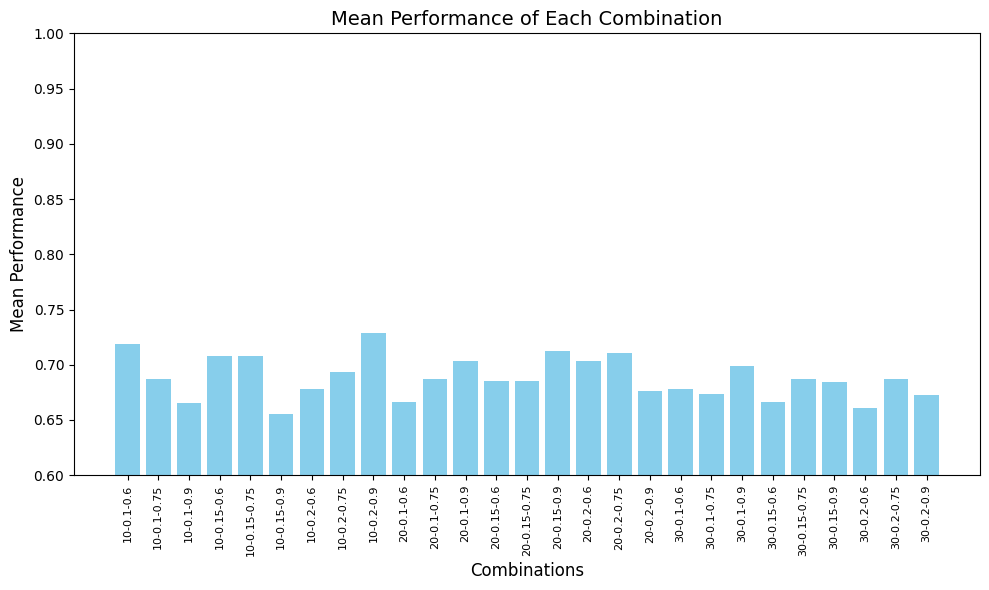

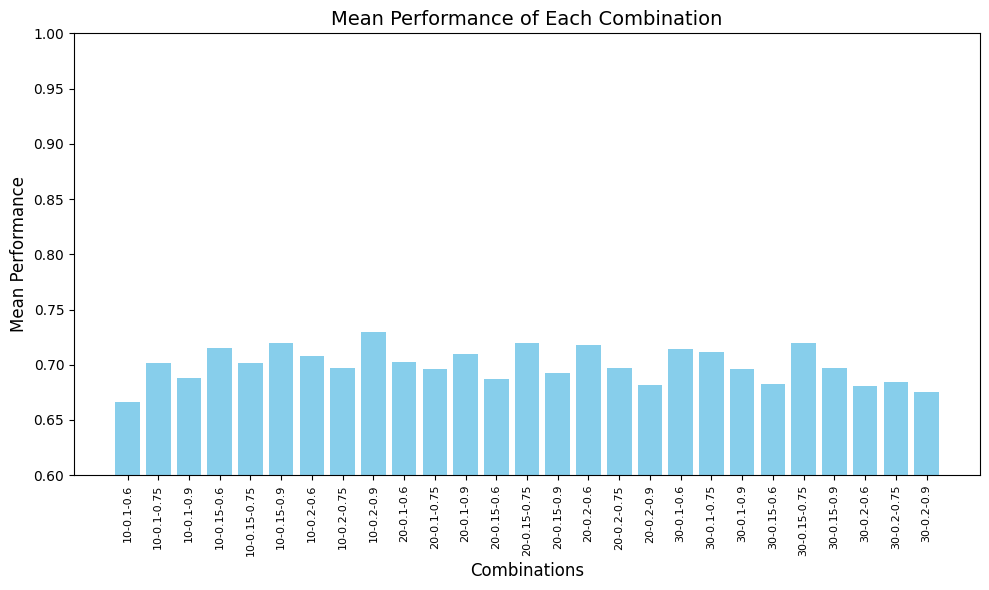

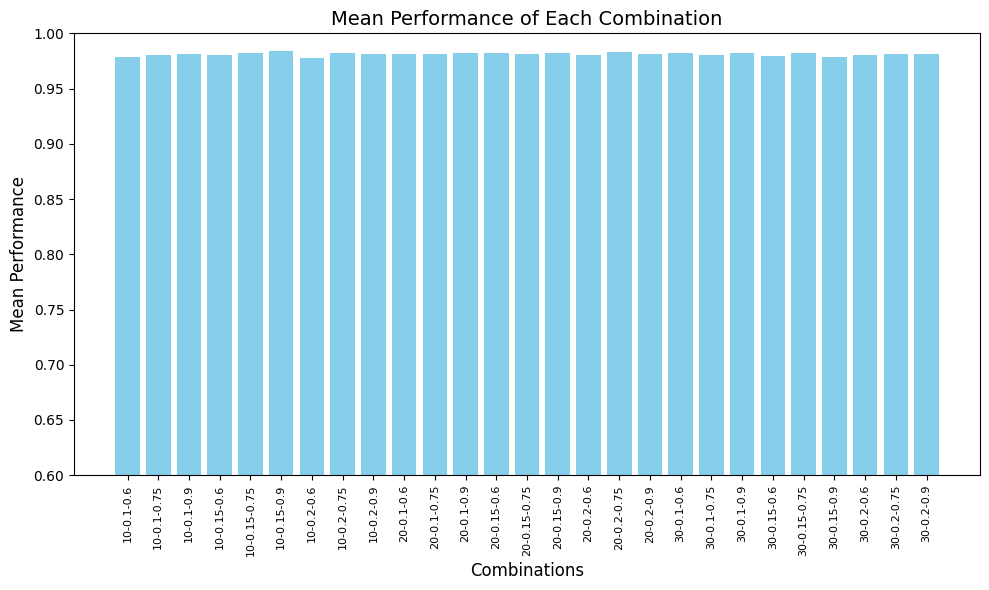

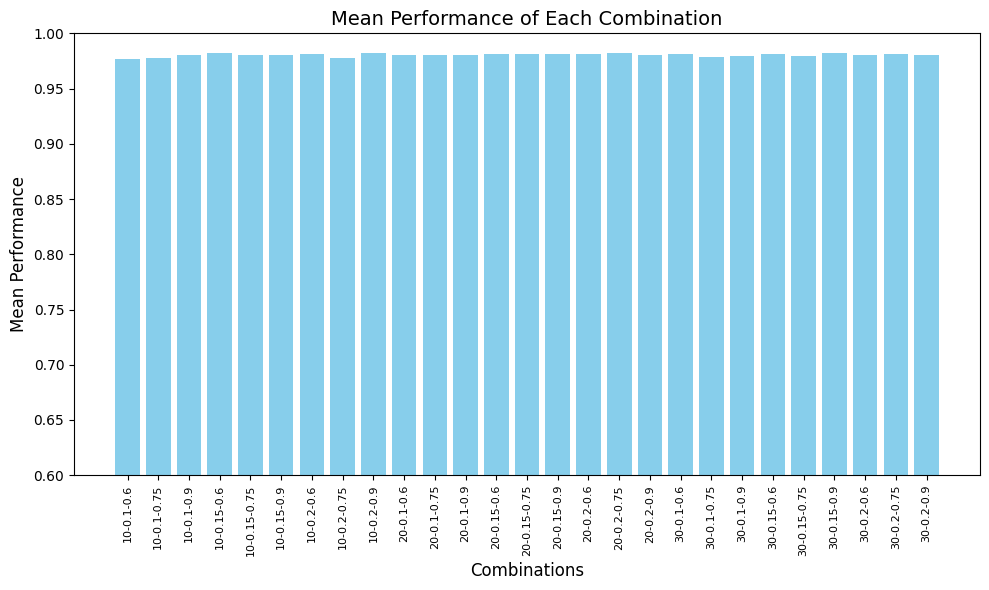

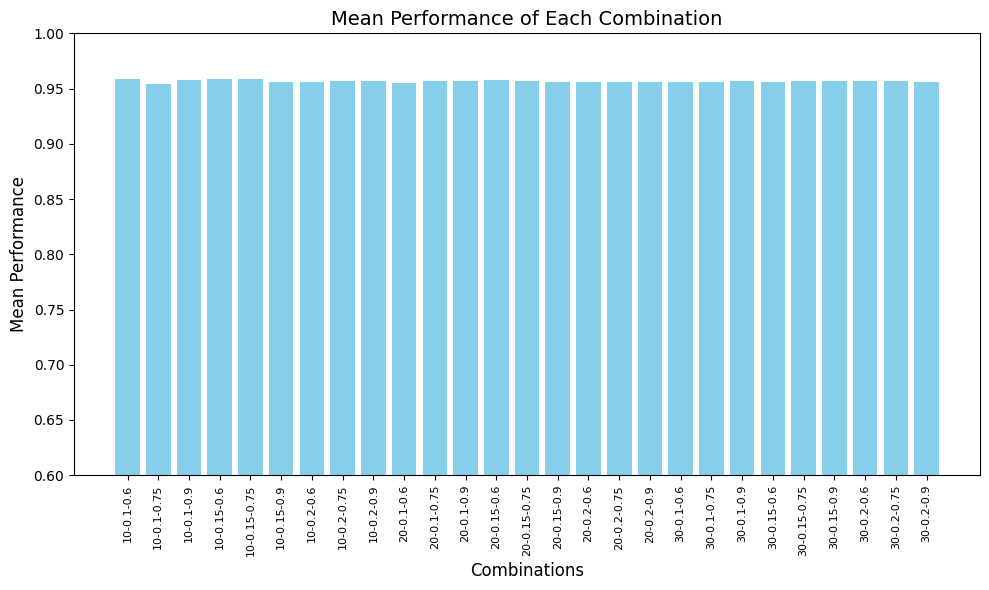

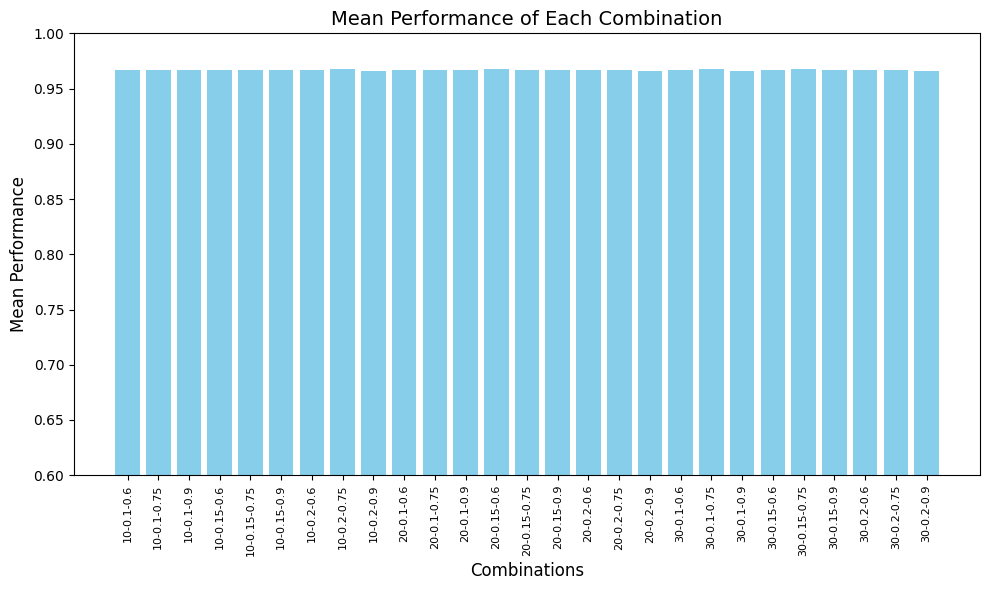

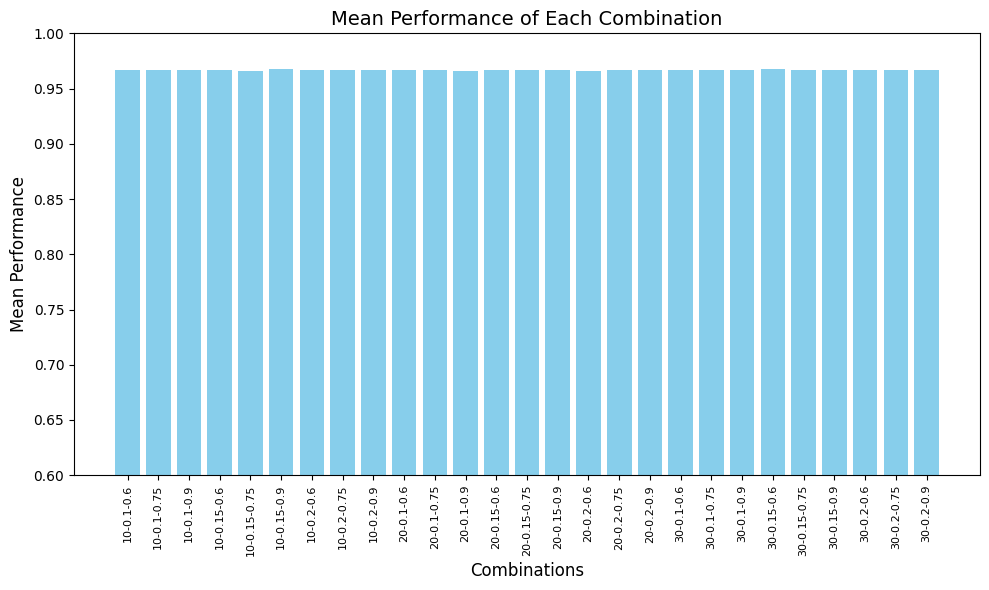

In [32]:
plot_mean_performance(data1)
plot_mean_performance(data2)
plot_mean_performance(data3)
plot_mean_performance(data4)
plot_mean_performance(data5)
plot_mean_performance(data6)
plot_mean_performance(data7)

In [33]:
def plot_line_graph(data, column_name):
    """
    Plots the given column values of the dataset using a line graph.

    Parameters:
        data (pandas.DataFrame): The dataset containing the values.
        column_name (str): The name of the column to plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column_name], color='blue', marker='o', linestyle='-', label=column_name)
    
    # Add labels and title
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.title(f'{column_name} Values', fontsize=14)
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [34]:
def plot_mean_column(data, colum_name):
    """
    Plots the mean of the Best Fitness for each population size, mutation rate, and crossover rate.

    Parameters:
        data (pandas.DataFrame): The dataset containing the fitness values.
    """
    parameters = ['Population Size', 'Mutation Rate', 'Crossover Rate']
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, parameter in enumerate(parameters):
        mean_best_fitness = data.groupby(parameter)[colum_name].mean()
        axs[i].scatter(mean_best_fitness.index, mean_best_fitness.values, color='skyblue')
        axs[i].set_xlabel(parameter, fontsize=12)
        axs[i].set_ylabel(f'Mean of {colum_name}', fontsize=12)
        axs[i].set_title(f'Mean of {colum_name} vs {parameter}', fontsize=14)
        axs[i].tick_params(axis='x', rotation=90, labelsize=8)

    plt.tight_layout()
    plt.show()

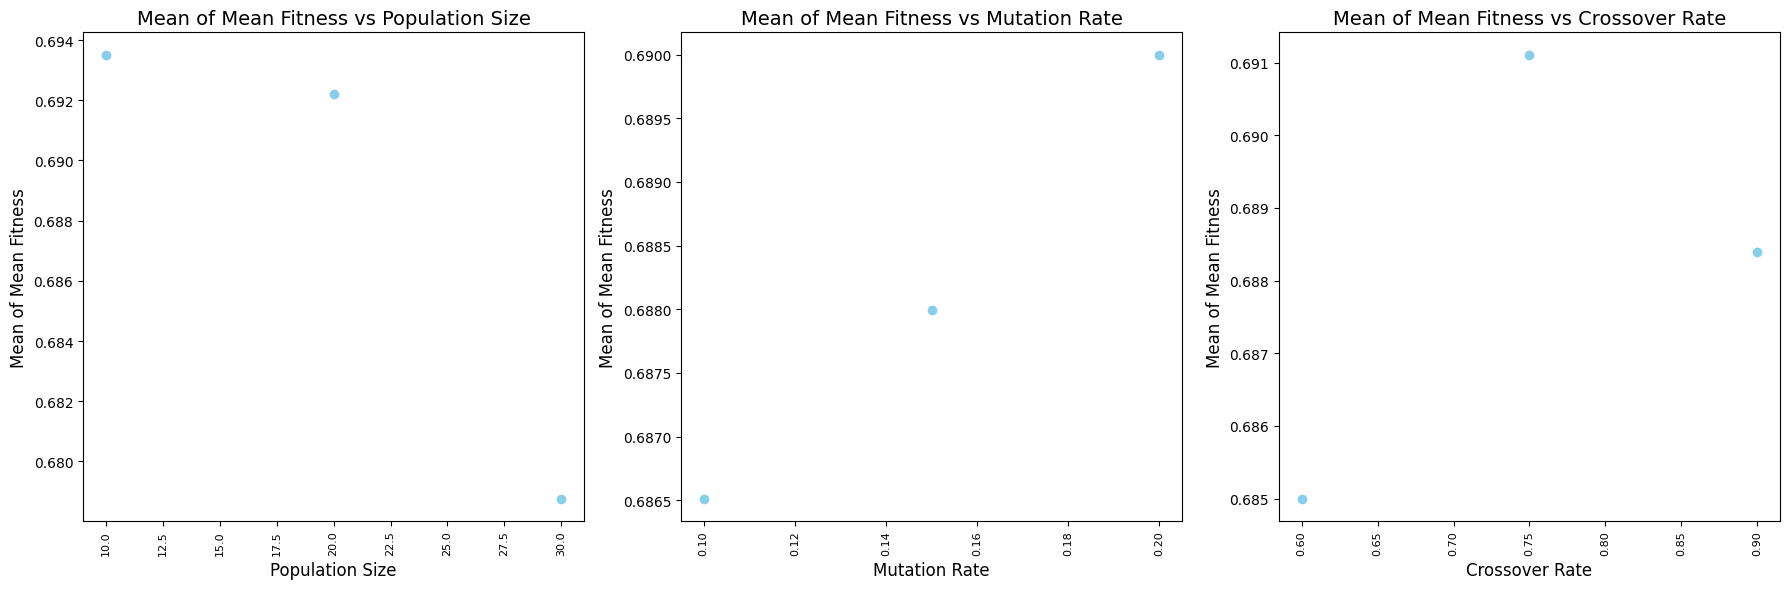

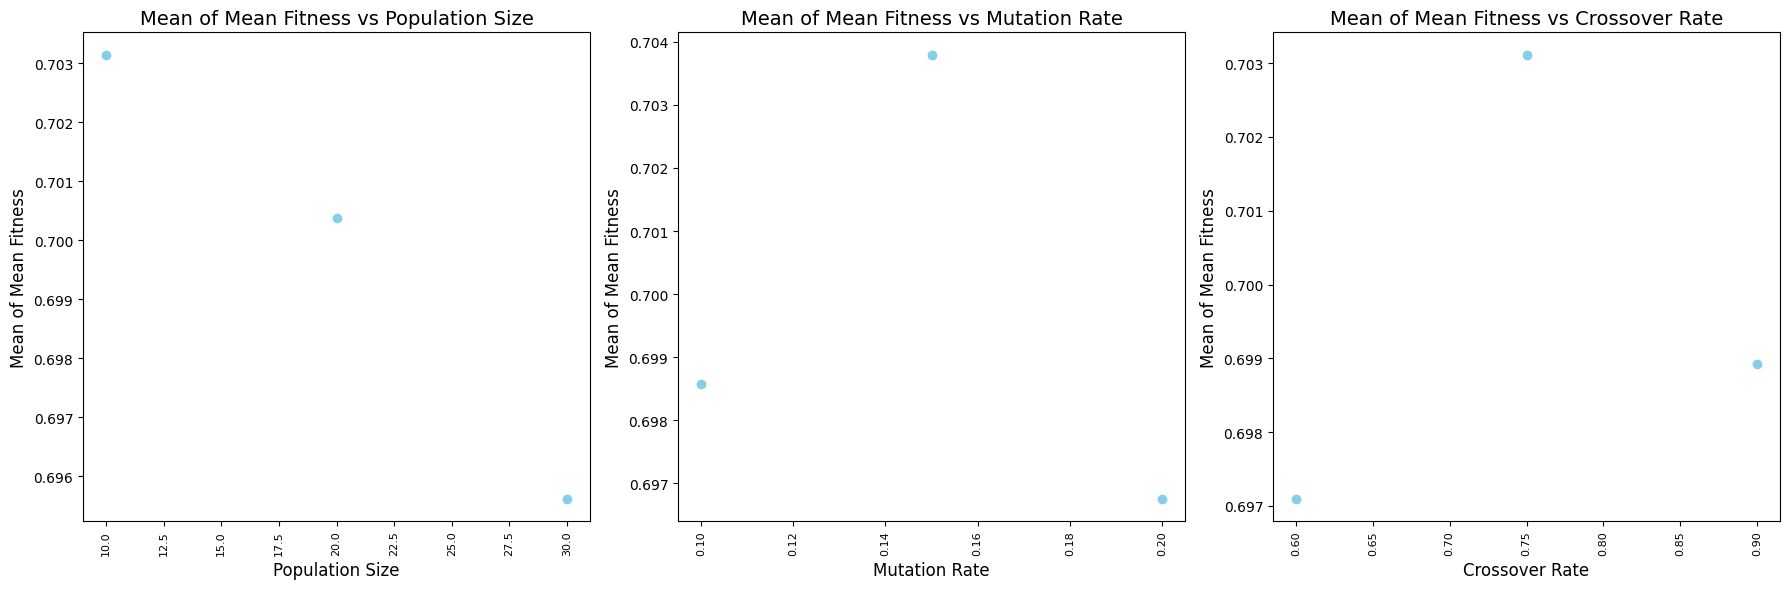

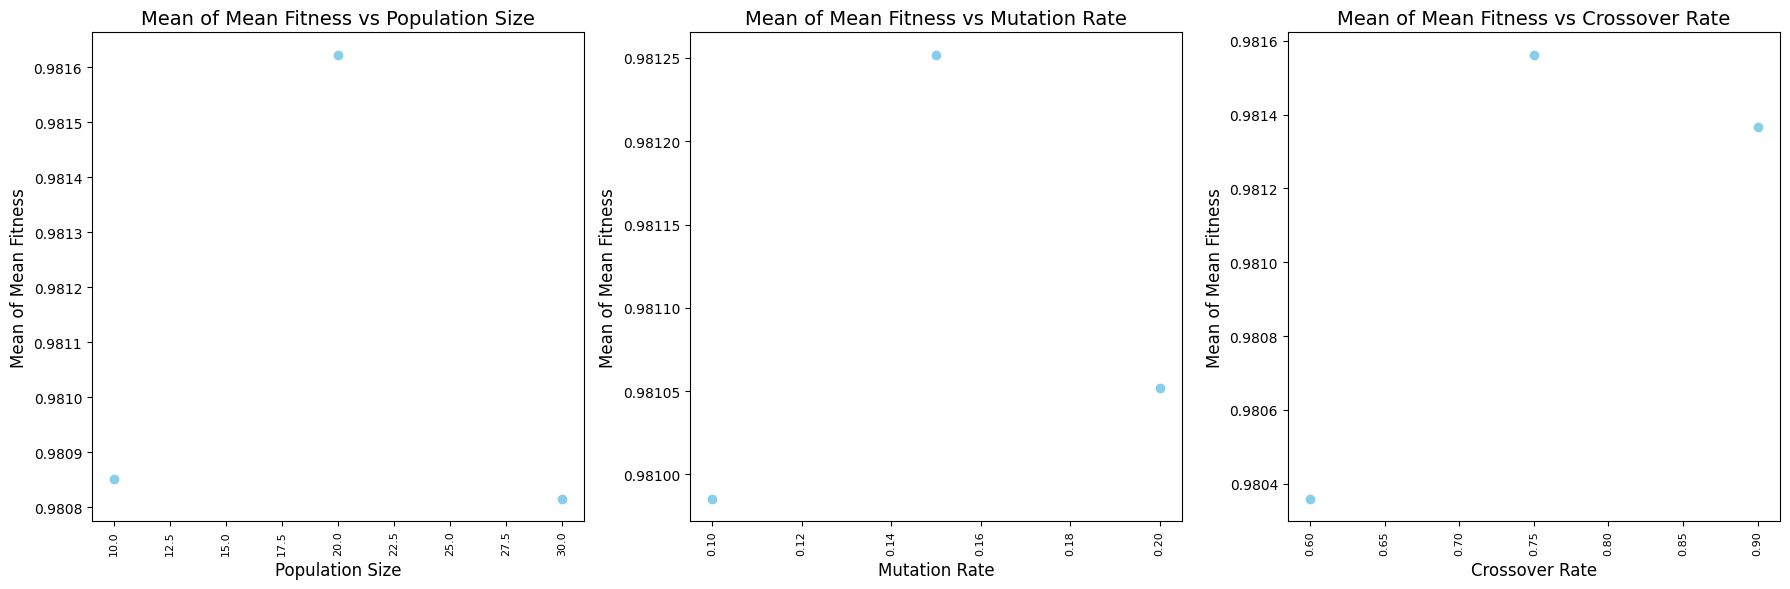

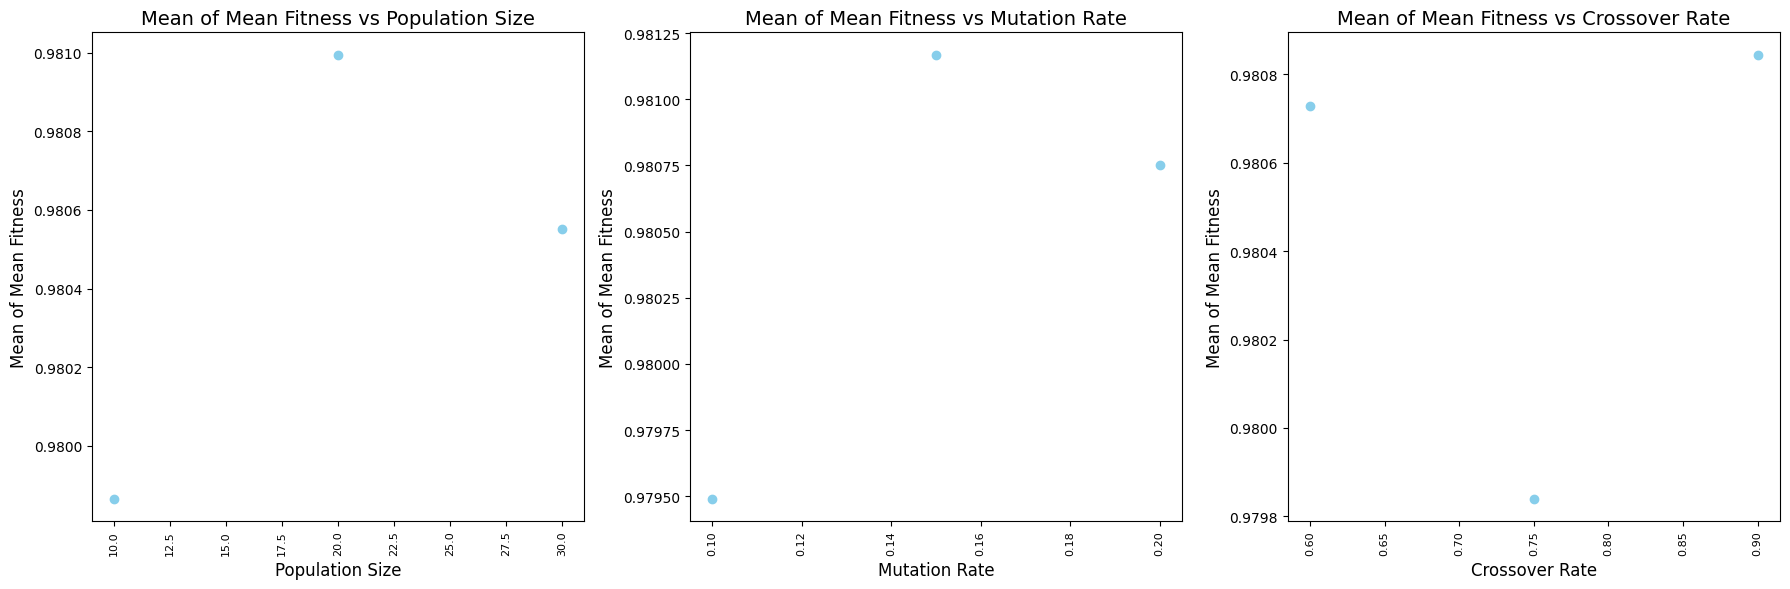

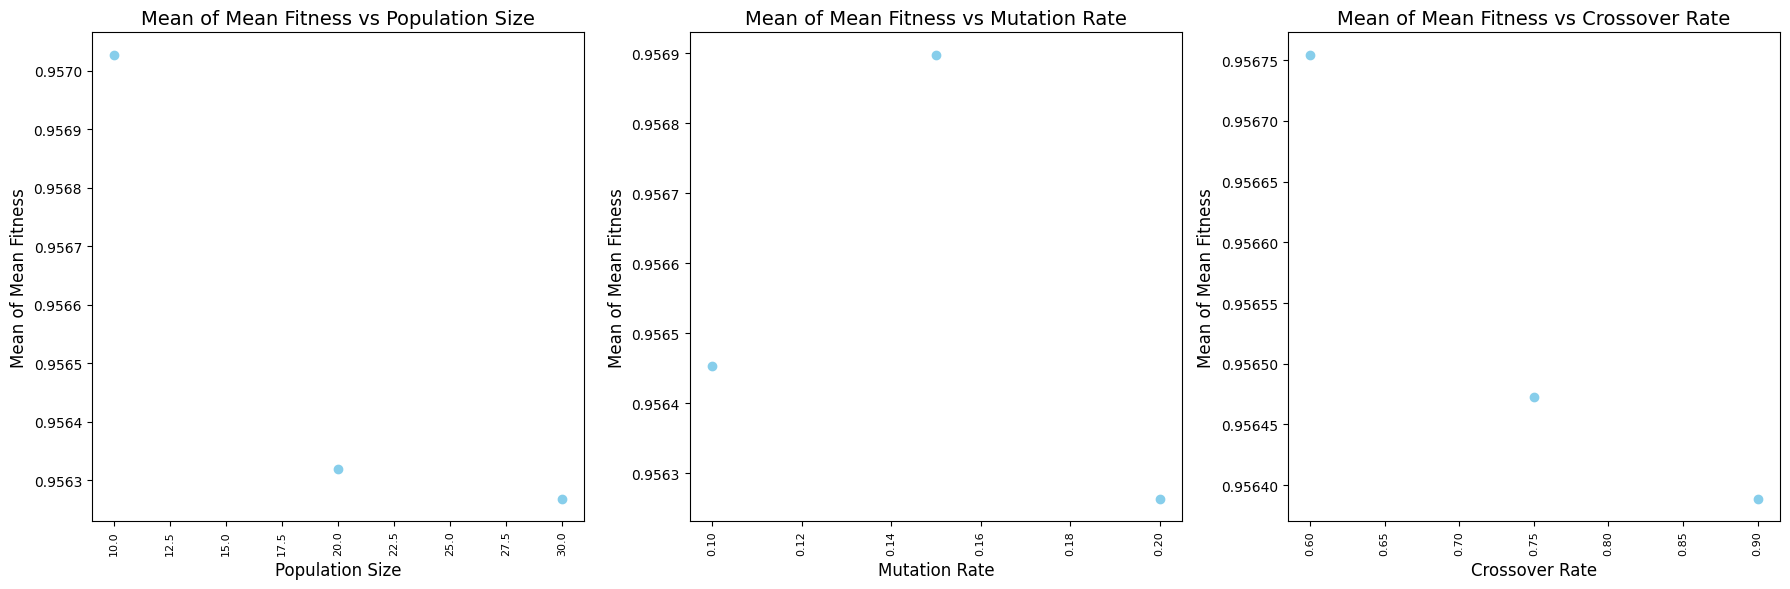

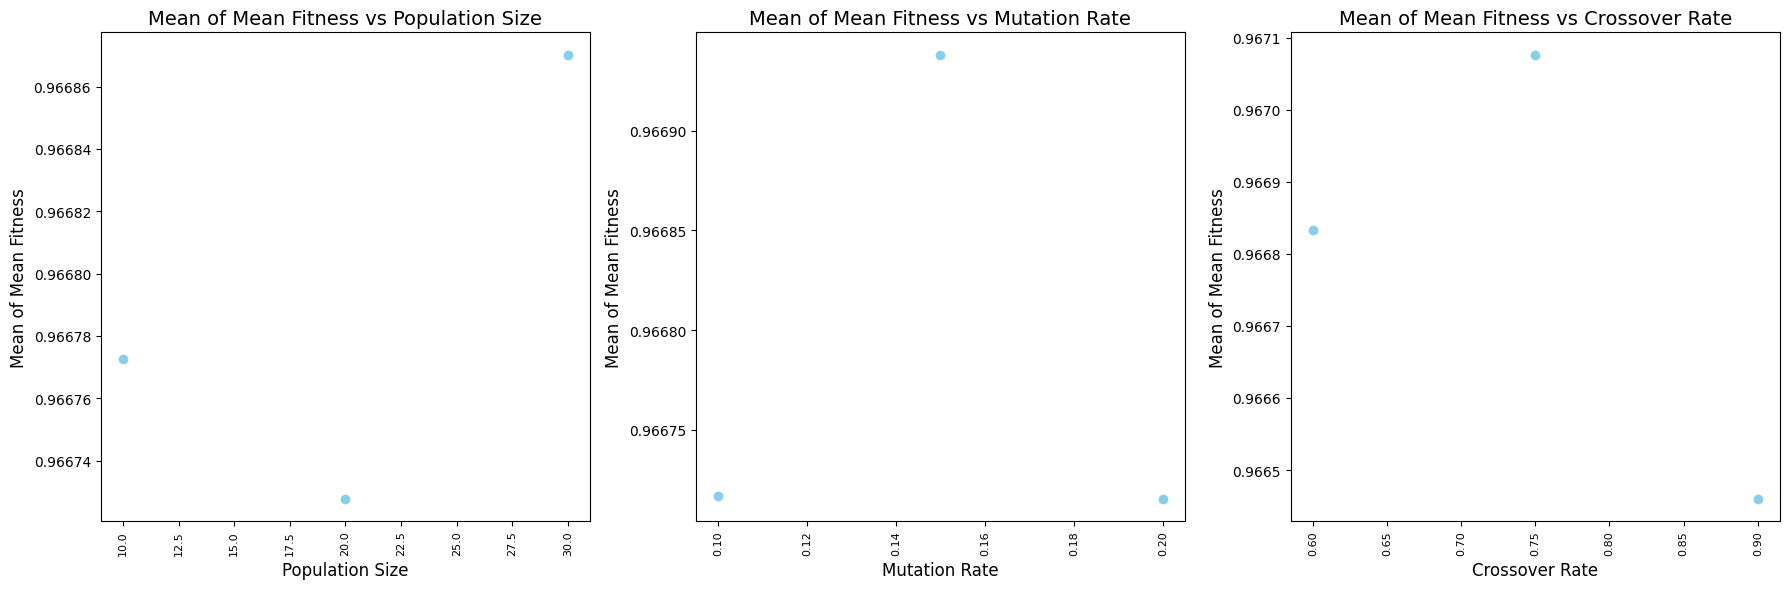

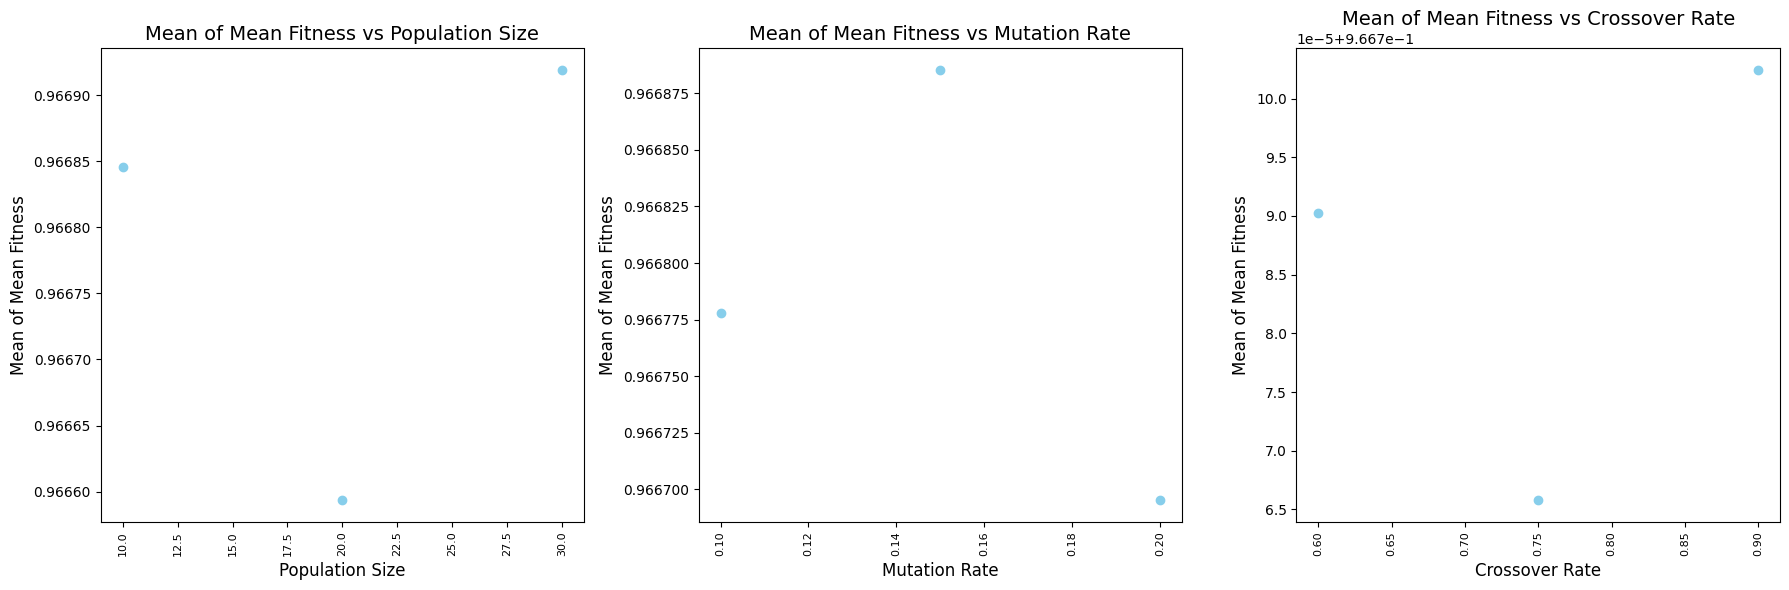

In [35]:
plot_mean_column(data1, "Mean Fitness")
plot_mean_column(data2, "Mean Fitness")
plot_mean_column(data3, "Mean Fitness")
plot_mean_column(data4, "Mean Fitness")
plot_mean_column(data5, "Mean Fitness")
plot_mean_column(data6, "Mean Fitness")
plot_mean_column(data7, "Mean Fitness")

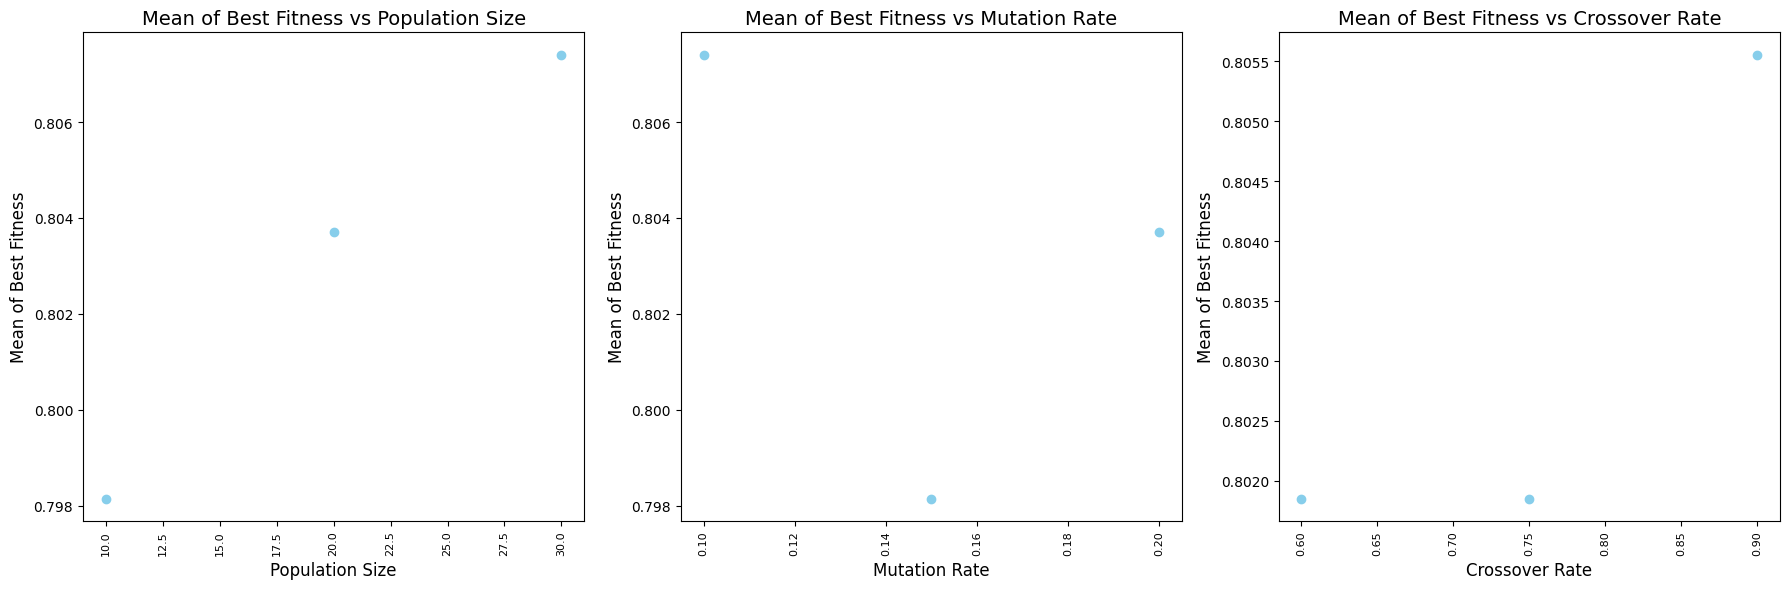

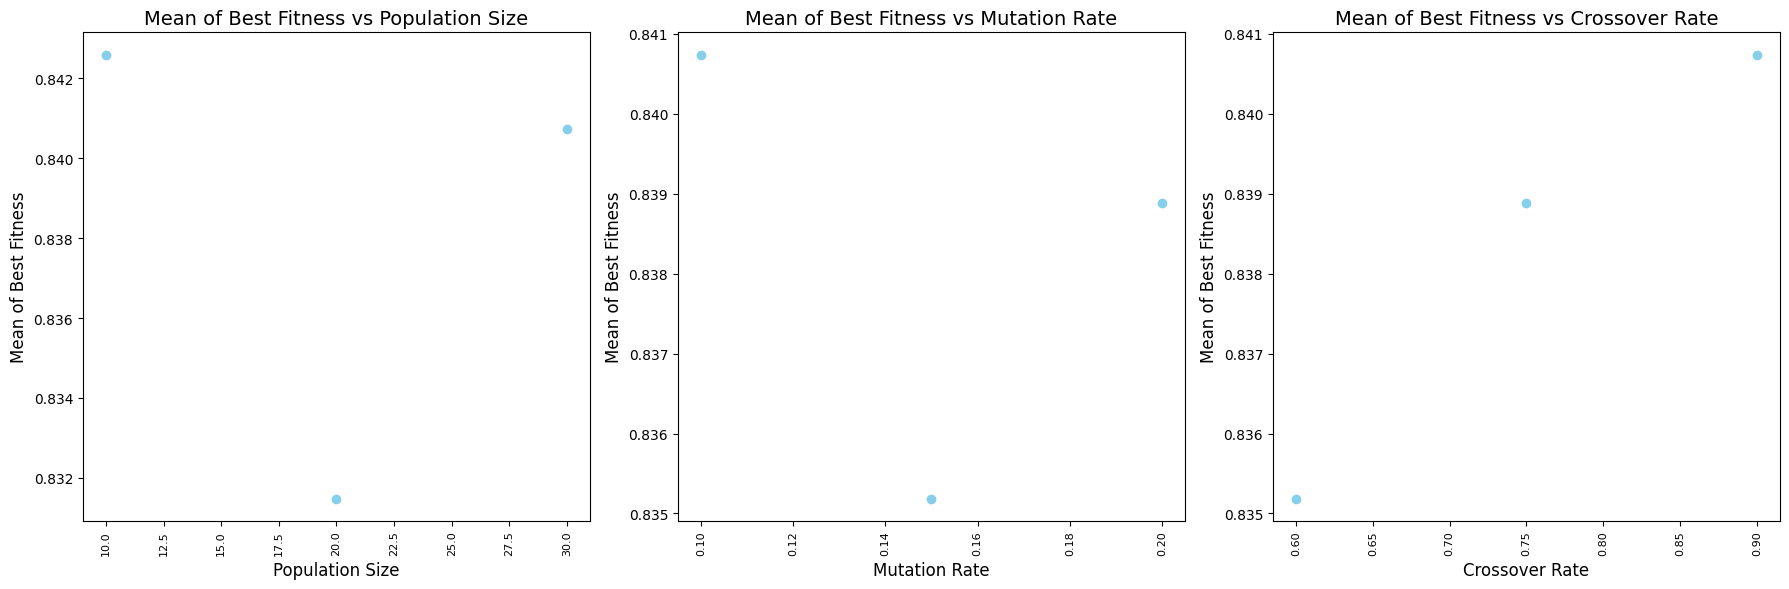

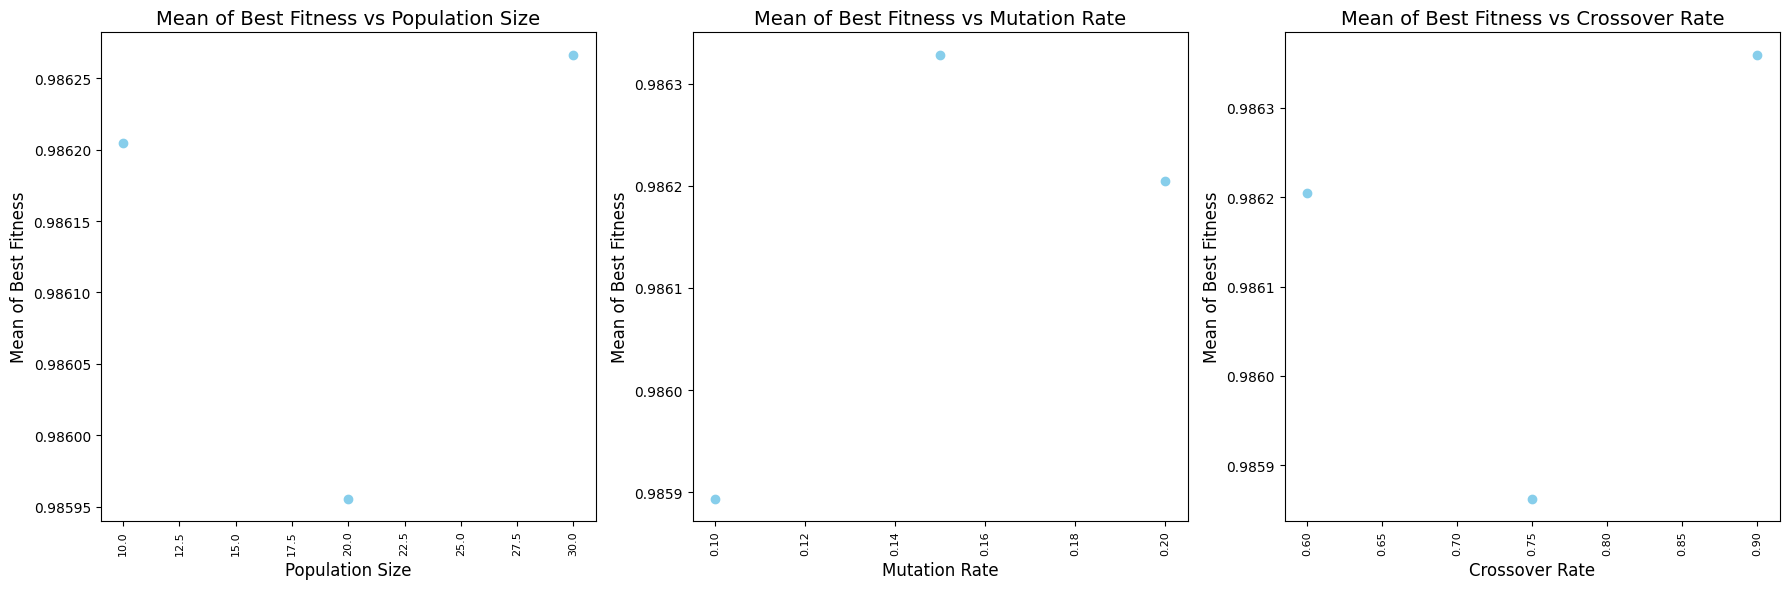

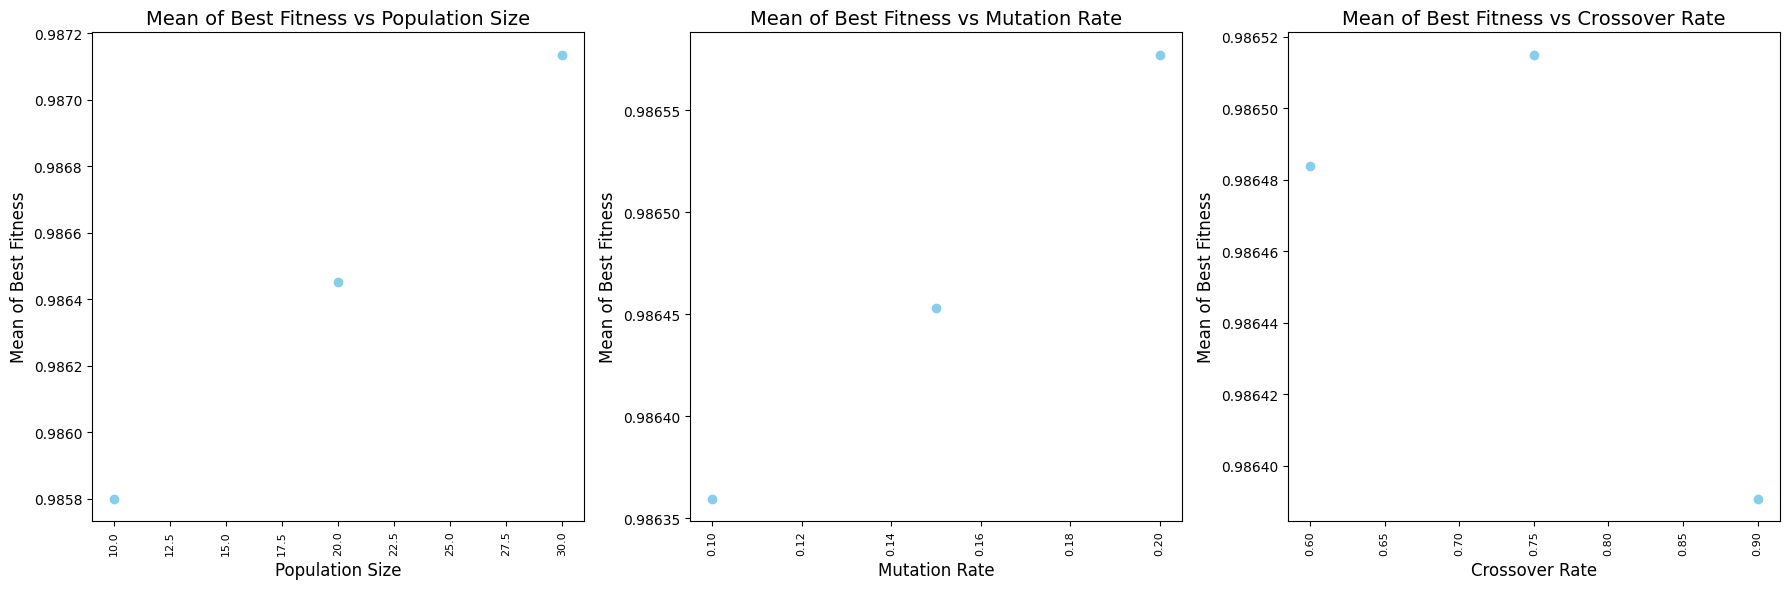

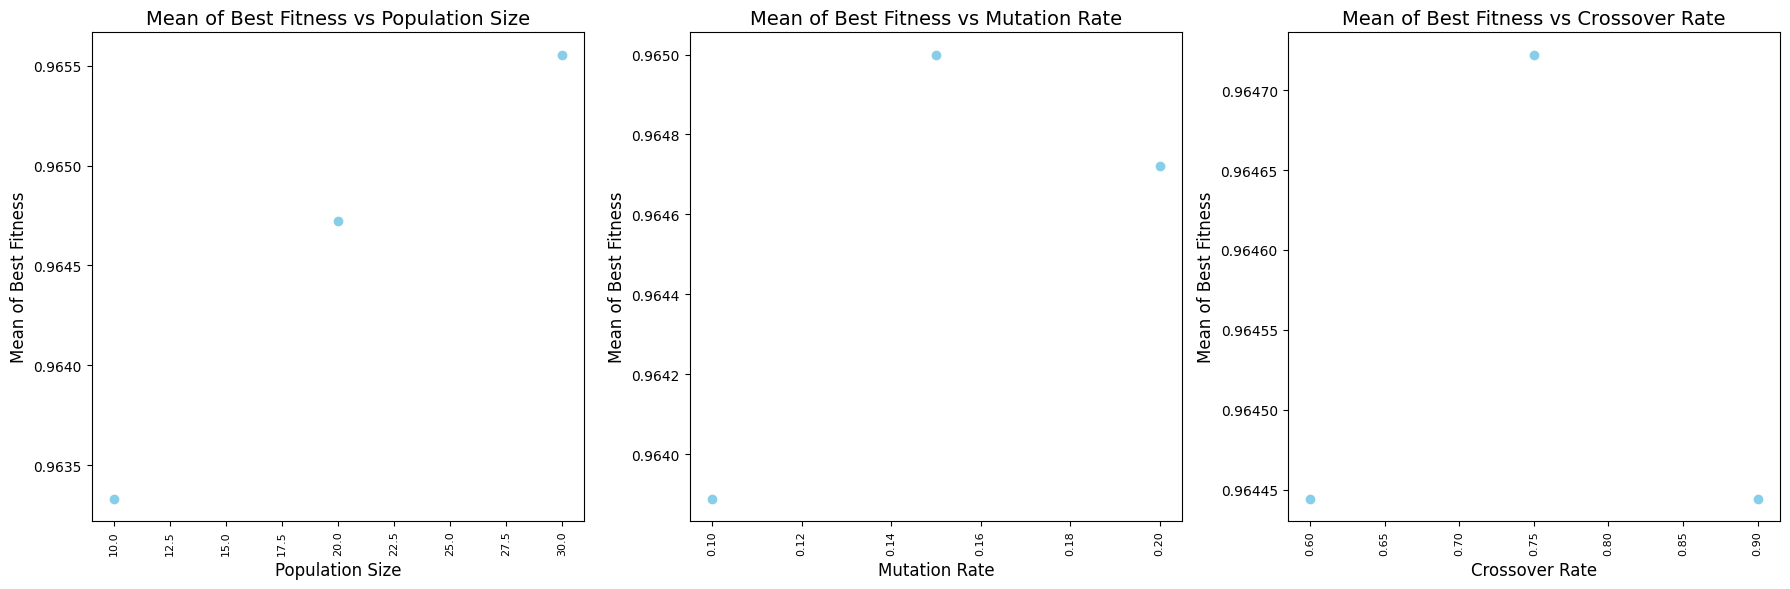

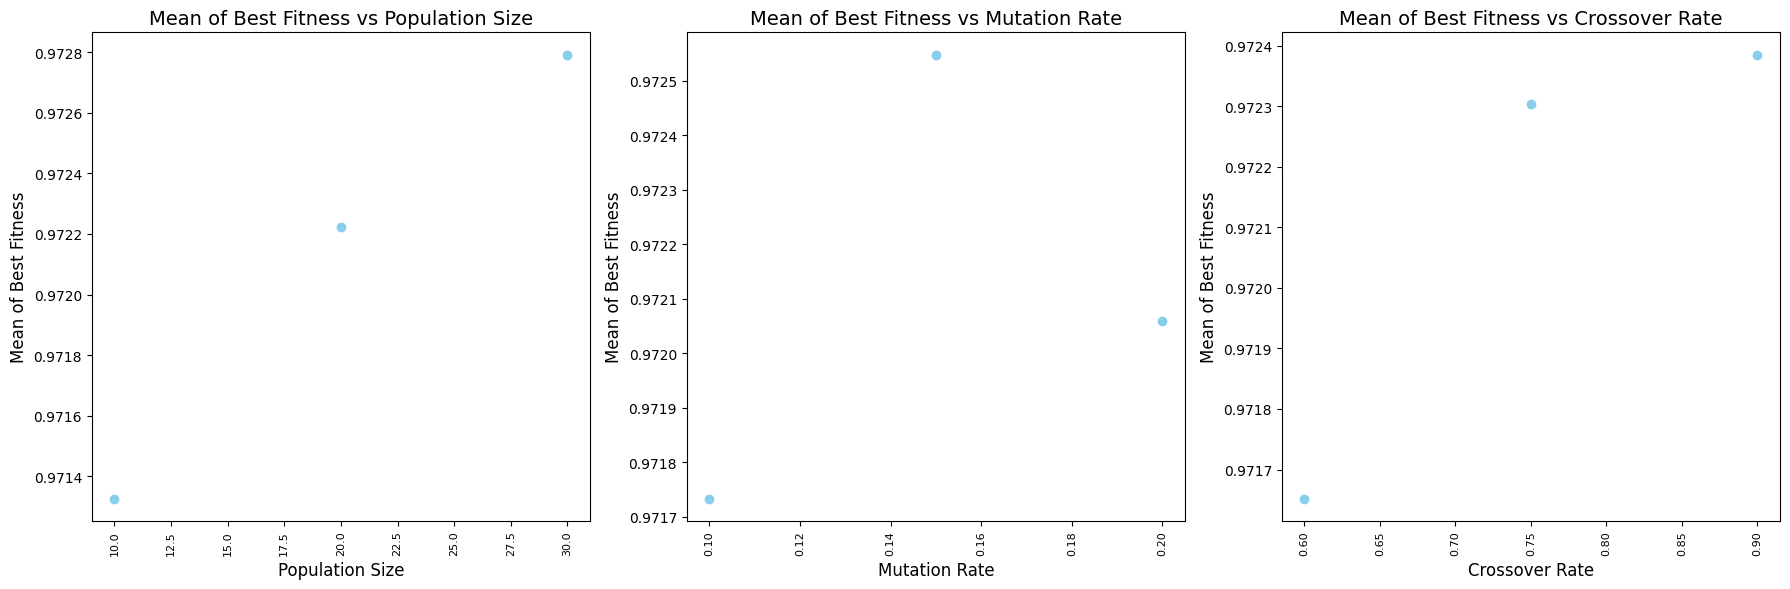

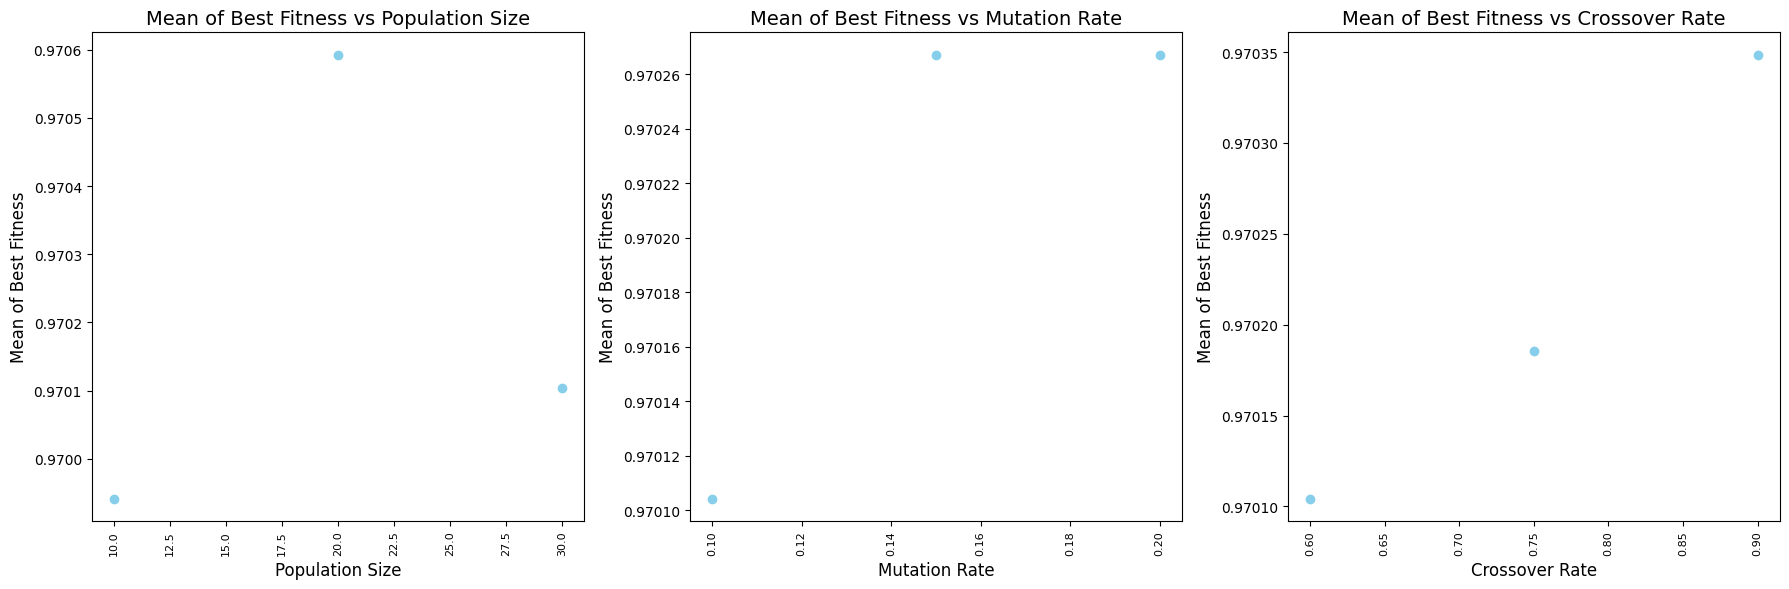

In [36]:
plot_mean_column(data1, "Best Fitness")
plot_mean_column(data2, "Best Fitness")
plot_mean_column(data3, "Best Fitness")
plot_mean_column(data4, "Best Fitness")
plot_mean_column(data5, "Best Fitness")
plot_mean_column(data6, "Best Fitness")
plot_mean_column(data7, "Best Fitness")

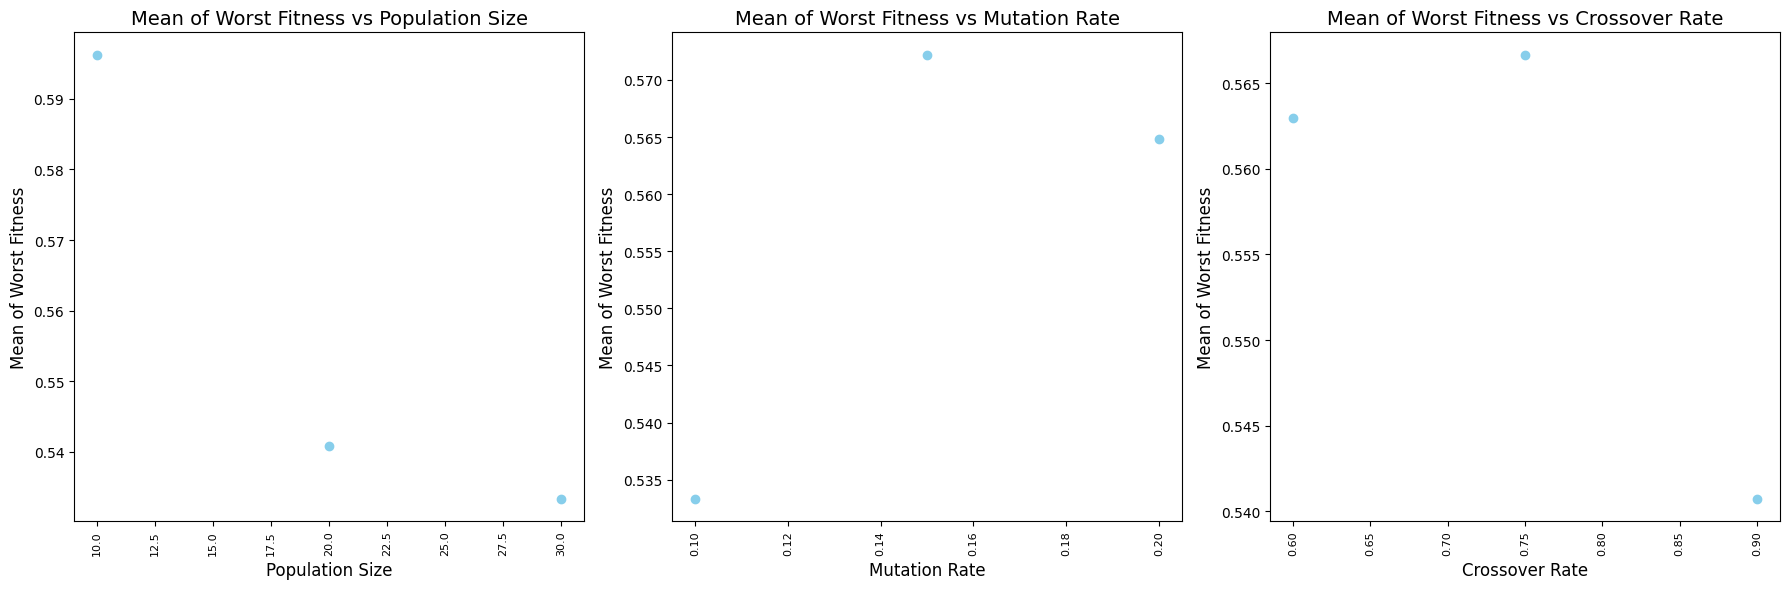

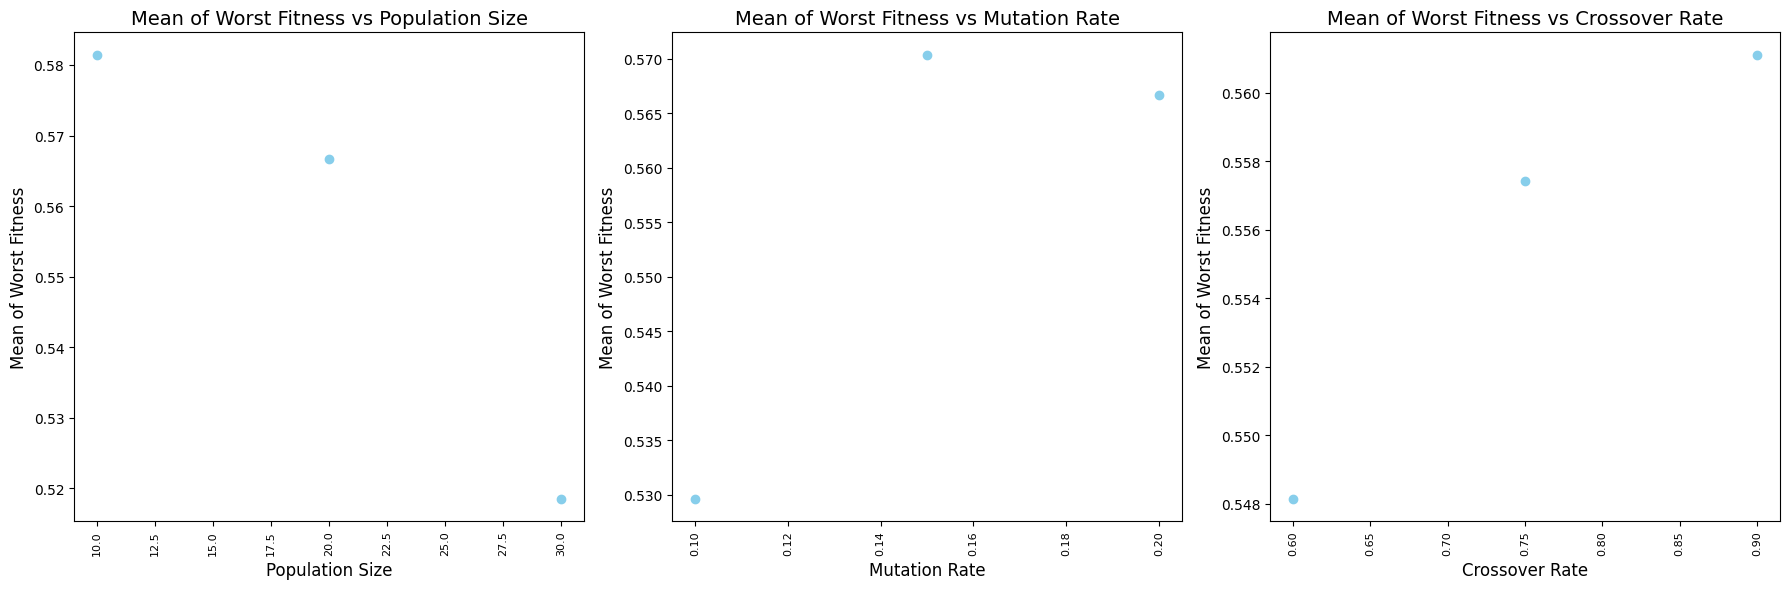

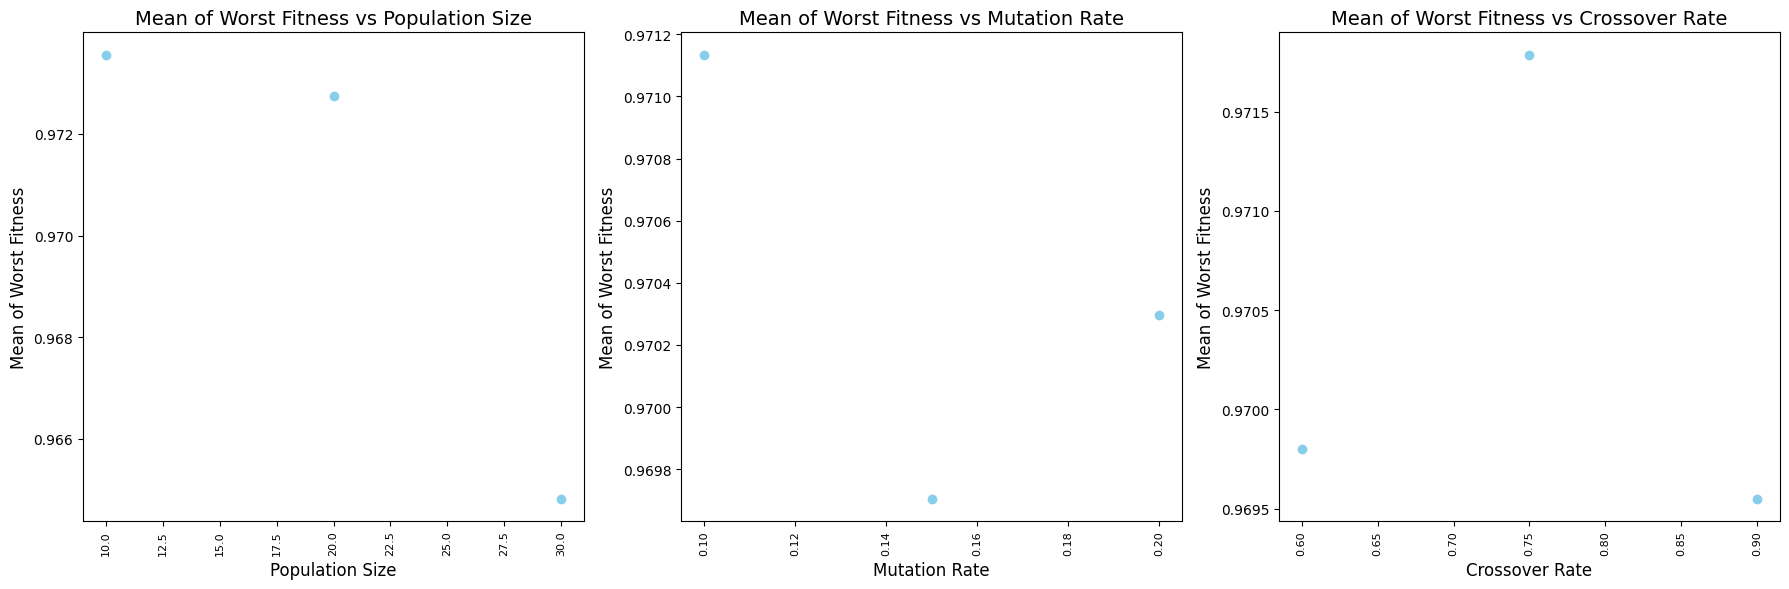

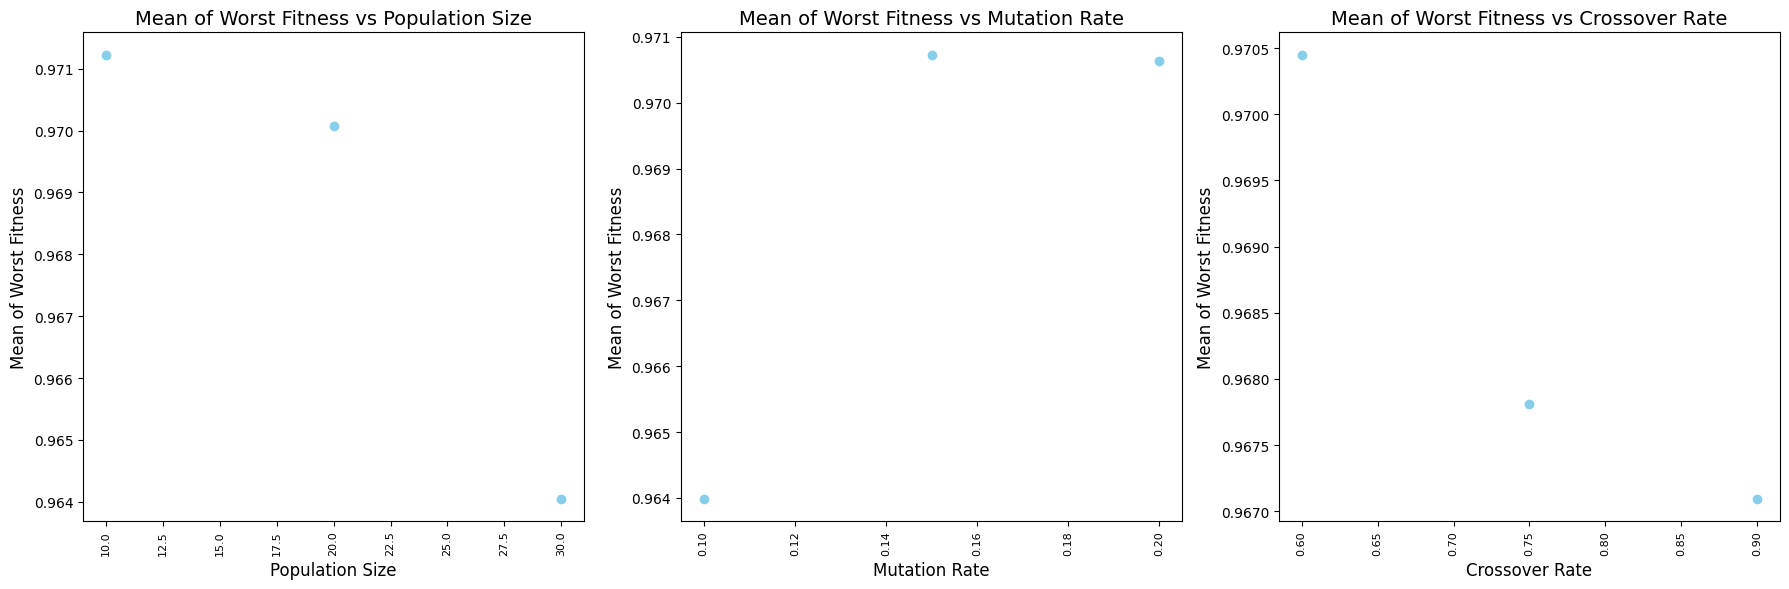

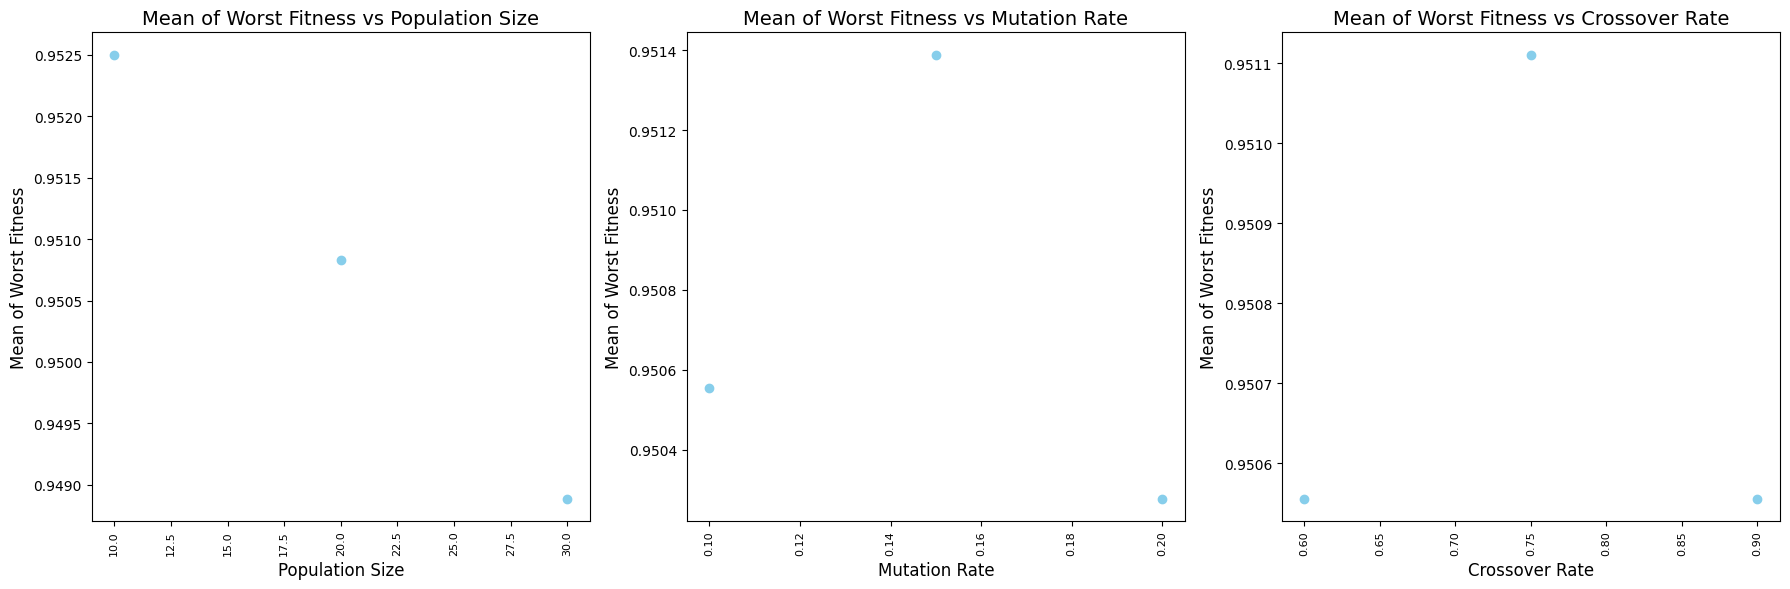

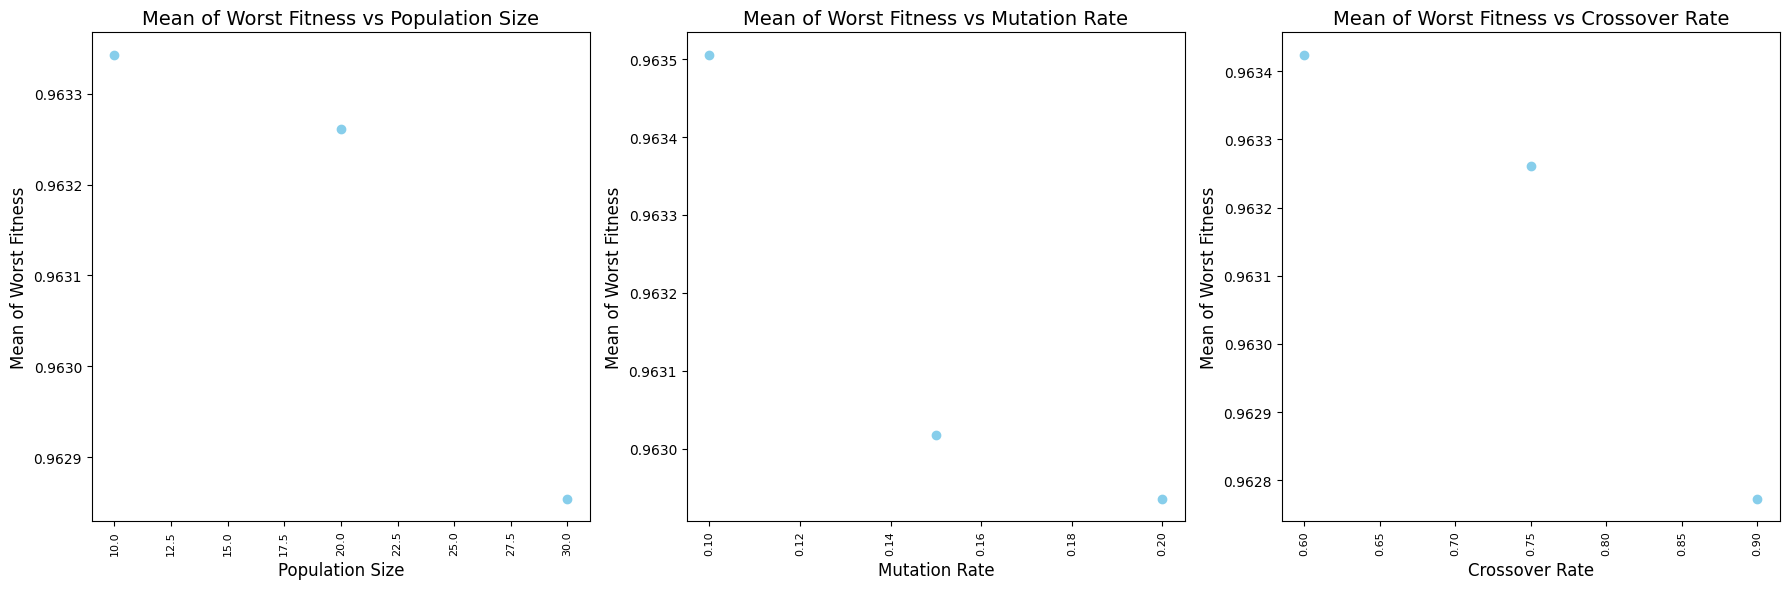

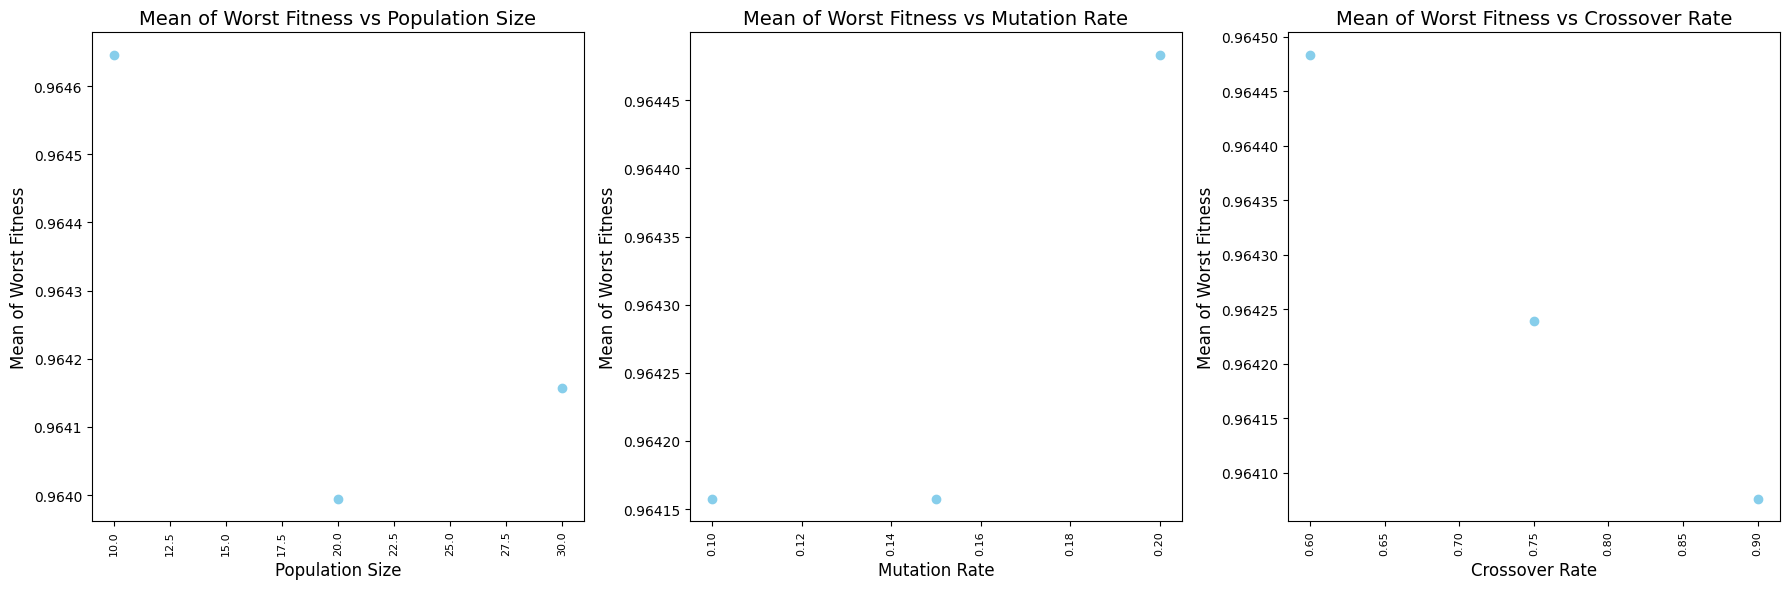

In [37]:
plot_mean_column(data1, "Worst Fitness")
plot_mean_column(data2, "Worst Fitness")
plot_mean_column(data3, "Worst Fitness")
plot_mean_column(data4, "Worst Fitness")
plot_mean_column(data5, "Worst Fitness")
plot_mean_column(data6, "Worst Fitness")
plot_mean_column(data7, "Worst Fitness")

In [38]:
display(data1)
display(data2)

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[0 1 0 1 1 0 1 1 1 0 1 1],0.800000,0.718333,0.046218,[1 1 1 0 1 0 1 0 0 0 0 0],0.616667
1,10,0.10,0.75,[1 0 0 0 1 1 0 1 0 1 0 1],0.783333,0.686667,0.049889,[1 1 0 1 0 0 0 0 1 1 0 0],0.616667
2,10,0.10,0.90,[1 1 0 0 1 0 0 0 0 0 1 1],0.800000,0.665000,0.108641,[0 0 0 1 0 1 1 0 0 1 0 0],0.433333
3,10,0.15,0.60,[0 0 0 1 1 0 1 1 1 1 0 1],0.783333,0.708333,0.049582,[1 1 0 1 1 0 1 0 0 0 0 0],0.616667
4,10,0.15,0.75,[0 1 0 1 1 1 1 1 1 0 1 1],0.783333,0.708333,0.038909,[1 1 1 0 1 0 1 0 1 1 0 0],0.633333
5,10,0.15,0.90,[0 0 1 1 1 0 0 1 0 1 1 1],0.816667,0.655000,0.059652,[1 1 1 0 0 1 1 0 0 1 0 0],0.583333
6,10,0.20,0.60,[0 0 0 1 1 0 1 1 1 1 0 1],0.800000,0.678333,0.061033,[0 0 0 1 1 1 1 0 1 0 0 0],0.583333
7,10,0.20,0.75,[0 0 0 1 1 0 1 1 1 1 0 1],0.800000,0.693333,0.041633,[1 0 1 1 0 0 0 0 0 0 0 0],0.616667
8,10,0.20,0.90,[0 0 0 0 1 1 1 1 1 1 1 1],0.816667,0.728333,0.037305,[1 1 0 1 1 0 1 0 1 1 1 0],0.666667
9,20,0.10,0.60,[0 0 0 0 1 1 0 0 0 0 0 1],0.816667,0.666667,0.084163,[0 1 1 0 1 0 0 0 0 1 0 0],0.533333


,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[0 0 0 1 0 1 1 1 1 1 0 1],0.833333,0.666667,0.082664,[0 0 1 1 0 1 1 0 0 1 0 0],0.483333
1,10,0.10,0.75,[0 0 0 0 1 0 1 1 0 0 0 1],0.850000,0.701667,0.062115,[0 1 0 0 1 0 0 0 1 1 1 0],0.583333
2,10,0.10,0.90,[0 0 0 1 1 0 0 1 1 1 0 1],0.850000,0.688333,0.068739,[1 1 1 0 1 0 0 0 0 1 1 0],0.566667
3,10,0.15,0.60,[1 0 0 0 1 0 1 1 0 0 0 1],0.816667,0.715000,0.052941,[1 0 0 1 0 0 1 1 0 0 0 0],0.600000
4,10,0.15,0.75,[0 1 0 0 1 0 1 1 1 1 0 1],0.850000,0.701667,0.085131,[0 1 1 1 0 1 1 1 1 1 1 0],0.600000
5,10,0.15,0.90,[0 0 1 1 1 1 0 1 1 1 1 1],0.850000,0.720000,0.073333,[0 0 1 1 1 0 1 1 0 0 0 0],0.600000
6,10,0.20,0.60,[1 0 0 0 1 0 0 0 1 1 0 1],0.833333,0.708333,0.054391,[0 0 0 0 1 0 0 1 1 1 0 0],0.650000
7,10,0.20,0.75,[0 1 0 0 1 0 1 1 1 1 0 1],0.850000,0.696667,0.066165,[1 1 1 1 0 1 0 0 0 0 0 0],0.550000
8,10,0.20,0.90,[0 0 0 1 1 0 1 1 0 0 0 1],0.850000,0.730000,0.064893,[1 1 0 1 0 1 0 0 0 1 1 0],0.600000
9,20,0.10,0.60,[0 0 1 1 1 1 0 1 1 1 1 1],0.833333,0.702500,0.057801,[0 0 1 1 0 0 1 0 1 1 0 0],0.533333


In [39]:
display(data3)
display(data4)

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0],0.986298,0.978607,0.004982,[1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0],0.966443
1,10,0.10,0.75,[0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1],0.984899,0.980509,0.002575,[1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0],0.975391
2,10,0.10,0.90,[0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1],0.986298,0.980928,0.001759,[0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1],0.979027
3,10,0.15,0.60,[0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1],0.986857,0.980257,0.004544,[0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0],0.969799
4,10,0.15,0.75,[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1],0.986298,0.982355,0.002499,[0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0],0.978468
5,10,0.15,0.90,[1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1],0.986577,0.983557,0.002233,[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0],0.979306
6,10,0.20,0.60,[1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0],0.986018,0.977908,0.006167,[0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1],0.967562
7,10,0.20,0.75,[1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1],0.986298,0.981823,0.003043,[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1],0.974832
8,10,0.20,0.90,[0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0],0.986298,0.981711,0.003989,[1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0],0.971197
9,20,0.10,0.60,[0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0],0.985738,0.980956,0.003356,[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0],0.971197


,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1],0.985179,0.976706,0.004521,[0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0],0.967002
1,10,0.10,0.75,[0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0],0.986018,0.977433,0.004780,[0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0],0.967841
2,10,0.10,0.90,[0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1],0.986018,0.980341,0.004178,[0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0],0.972315
3,10,0.15,0.60,[1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1],0.986018,0.982159,0.001380,[1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0],0.979586
4,10,0.15,0.75,[1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1],0.986018,0.980285,0.005494,[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0],0.966723
5,10,0.15,0.90,[1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0],0.985179,0.980677,0.002910,[0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1],0.975112
6,10,0.20,0.60,[1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0],0.986577,0.981683,0.001258,[0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1],0.979866
7,10,0.20,0.75,[0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0],0.985459,0.977321,0.007804,[0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1],0.956096
8,10,0.20,0.90,[0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0],0.985738,0.982187,0.002299,[1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0],0.976510
9,20,0.10,0.60,[0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1],0.985179,0.980663,0.002533,[1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0],0.975112


In [40]:
display(data5)
display(data6)
display(data7)

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1\n 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0\n 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0],0.9625,0.959000,0.003742,[1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0\n 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0\n 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1],0.9525
1,10,0.10,0.75,[1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0\n 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1\n 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0],0.9625,0.954250,0.004337,[1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0\n 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1\n 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0],0.9475
2,10,0.10,0.90,[1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1\n 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0\n 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1],0.9625,0.957750,0.002610,[0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0\n 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0\n 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0],0.9525
3,10,0.15,0.60,[0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1\n 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1\n 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1],0.9650,0.958500,0.002291,[0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0\n 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0\n 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1],0.9550
4,10,0.15,0.75,[0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0\n 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0\n 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1],0.9650,0.958500,0.003000,[1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0\n 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1\n 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1],0.9550
5,10,0.15,0.90,[1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1\n 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1\n 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0],0.9625,0.955750,0.001953,[0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1\n 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1\n 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0],0.9525
6,10,0.20,0.60,[0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0\n 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1\n 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0],0.9625,0.955750,0.002750,[1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0\n 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1\n 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0],0.9525
7,10,0.20,0.75,[1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1\n 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0\n 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0],0.9625,0.957250,0.002839,[1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1\n 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0\n 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0],0.9525
8,10,0.20,0.90,[1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1\n 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1\n 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0],0.9650,0.956500,0.002550,[1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1\n 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1\n 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1\n 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0],0.971408,0.966862,0.001422,[0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0\n 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0\n 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1],0.964809
1,10,0.10,0.75,[1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0\n 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0\n 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1],0.971408,0.966642,0.002370,[1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0\n 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0\n 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1],0.962610
2,10,0.10,0.90,[0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0\n 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0\n 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0],0.970674,0.966422,0.001934,[0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0\n 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0\n 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1],0.962610
3,10,0.15,0.60,[0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0\n 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0\n 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0],0.970674,0.966789,0.001797,[0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0\n 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1\n 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1],0.964076
4,10,0.15,0.75,[1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1\n 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0\n 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1],0.972141,0.966789,0.002519,[0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0\n 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0\n 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1],0.963343
5,10,0.15,0.90,[1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1\n 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1\n 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0],0.972874,0.966935,0.002570,[1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1\n 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0\n 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0],0.962610
6,10,0.20,0.60,[0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0\n 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0\n 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1],0.971408,0.966642,0.002080,[1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0\n 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1\n 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1],0.964076
7,10,0.20,0.75,[0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0\n 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1\n 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0],0.971408,0.967889,0.001566,[1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0\n 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1\n 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1],0.964809
8,10,0.20,0.90,[1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0\n 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1\n 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0],0.969941,0.965982,0.002918,[0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1\n 0 0 0 0 1 

,Population Size,Mutation Rate,Crossover Rate,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,10,0.10,0.60,[1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0\n 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0\n 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0],0.970674,0.966496,0.001540,[1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1\n 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0\n 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1],0.964076
1,10,0.10,0.75,[0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1\n 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0\n 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0],0.969941,0.966789,0.000737,[0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0\n 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0\n 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0],0.965543
2,10,0.10,0.90,[1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0\n 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0\n 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0],0.969208,0.967082,0.001246,[0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1\n 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0\n 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1],0.964076
3,10,0.15,0.60,[1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0\n 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1\n 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1],0.969941,0.967229,0.001272,[1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1\n 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0\n 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0],0.965543
4,10,0.15,0.75,[1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0\n 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0\n 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0],0.969208,0.965909,0.001680,[1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0\n 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0\n 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0],0.963343
5,10,0.15,0.90,[0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1\n 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1\n 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1],0.970674,0.967595,0.001600,[1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0\n 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1\n 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1],0.964809
6,10,0.20,0.60,[1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1\n 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1\n 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0],0.969941,0.966862,0.001218,[1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0\n 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0\n 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0],0.964809
7,10,0.20,0.75,[0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0\n 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1\n 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1],0.970674,0.966862,0.001303,[1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1\n 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0\n 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0],0.964809
8,10,0.20,0.90,[1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0\n 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1\n 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0],0.969208,0.966789,0.001272,[1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0\n 0 1 0 0 1 